<a href="https://colab.research.google.com/github/Davetepa/Talento_Tech_Files/blob/main/Proyecto%3A%20Project_sales_%7C_IOWA_LINN_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EDA Iowa Liquor Sales</p>


---

## Descripción
Este conjunto de datos contiene información sobre las compras de bebidas alcohólicas de los titulares de licencias de bebidas alcohólicas de clase “E” de Iowa por producto y fecha de compra desde el 1 de enero de 2012 hasta la actualidad. El conjunto de datos se puede utilizar para analizar las ventas totales de bebidas alcohólicas en Iowa de productos individuales a nivel de tienda.

La licencia de bebidas alcohólicas de clase E, para tiendas de comestibles, licorerías, tiendas de conveniencia, etc., permite a los establecimientos comerciales vender bebidas alcohólicas para consumo fuera de las instalaciones en envases originales sin abrir.

## Atributos del Dataset
    
- **Date** : Fecha del pedido
- **Store Name** : Nombre de la tienda que pidió el licor.
- **County** : Condado donde se encuentra la tienda que ordenó el licor
- **Category Name** : Categoría del licor solicitado.
- **Vendor Name** : El nombre del proveedor de la empresa de la marca de licor solicitada
- **Item Description** : Descripción del producto licor individual solicitado.
- **Pack** : El número de botellas en una caja para el licor pedido.
- **Bottle Volume (ml)** : Volumen de cada botella de licor ordenada en mililitros.
- **State Bottle Cost** : El monto que la División de Bebidas Alcohólicas pagó por cada botella de licor solicitada
- **State Bottle Retail** : La cantidad que la tienda pagó por cada botella de licor solicitada
- **Bottles Sold** : El número de botellas de licor pedidas por la tienda.
- **Sale (Dollars)** : Costo total del pedido de licor (número de botellas multiplicado por el precio minorista de las botellas en el estado)
- **Volume Sold (Liters)** : Volumen total de licor pedido en litros. (es decir, (volumen de la botella (ml) x botellas vendidas)/1000)
- **Volume Sold (Gallons)** : Volumen total de licor pedido en galones. (es decir, (volumen de la botella (ml) x botellas vendidas)/3785,411784)

  
**URL**:(https://catalog.data.gov/dataset/iowa-liquor-sales)

---

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLA DE CONTENIDO</p>   
    
* [1. Import de Librerías](#1)
    
* [2. Import de Dataset](#2)
    
* [3. Exploaración del Dataset](#3)
    


# **IMPORTAR LIBRERIAS**

In [ ]:
# Se importan las librerías necesarias para el desarrollo del Análisis Exploratorio de Datos (EDA)
import pandas as pd  # Para la manipulación y análisis de datos
import os  # Para interactuar con el sistema operativo (manejo de archivos, etc.)
import matplotlib.pyplot as plt  # Para la creación de gráficos
import numpy as np  # Para operaciones numéricas y matemáticas

# Se configuran las opciones de visualización de pandas para mostrar todas las filas, columnas y formato de números.
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Formatear números flotantes con 2 decimales

# Se ignoran las advertencias para una salida más limpia.
import warnings
warnings.filterwarnings('ignore')

# Se monta Google Drive para acceder a los archivos almacenados allí.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **IMPORTAR EL DATASET**

In [ ]:
try:
    # Leer el archivo CSV ubicado en la ruta especificada y asigna los datos a la variable df_resultados
    ruta = "/content/drive/MyDrive/Colab Notebooks/Talento tech Project/"
    iowa_liquor = pd.read_csv(ruta + "iowa_liquor_sales_filtered.csv")

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("El dataset se cargó exitosamente")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileExistsError as e:

    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se puede encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as e:

    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error inesperado: {e}")

El dataset se cargó exitosamente


#### ***Para limitar alcance, se tomorá solo el año 2019 al 2022 y así ver el compotamiento pre y post pandemia, así se acota el estudio solo sobre los Condados de polk, linn, scott y johnson.***

In [ ]:
# # Convertir la columna 'Date' a tipo datetime
# iowa_liquor['Date'] = pd.to_datetime(iowa_liquor['Date'])

# # Filtrar las filas donde las fechas estén entre 2019 y 2022
# df_filtrado = iowa_liquor[(iowa_liquor['Date'] >= '2019-01-01') & (iowa_liquor['Date'] <= '2022-12-31')]
# print(df_filtrado.shape)

# # Filtrado de los condados objetivo del proyecto : Polk, linn, scott, jhonson que presentan mayores ventas
# condados = ['POLK','LINN','SCOTT','JOHNSON']

# # Filtrar el DataFrame basado en esas categorías y el nuevo dataframe será el del proyecto
# df_filtrado = df_filtrado[df_filtrado['County'].isin(condados)]
# df_filtrado.shape

# **EXPLORACION DATASET**

In [ ]:
# Dimensión y visualización de las primera 5 filas del dataframe
print(iowa_liquor.shape)
iowa_liquor.head(5)

(3871596, 14)


,Date,Store Name,County,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2019-06-10,HILLTOP GROCERY,SCOTT,CANADIAN WHISKIES,CONSTELLATION BRANDS INC,BLACK VELVET,48,200,1.56,2.34,48,112.32,9.60,2.53
1,2019-06-12,HY-VEE / WINDSOR HEIGHTS,POLK,IMPORTED BRANDIES,MOET HENNESSY USA,HENNESSY VS,24,200,6.24,9.36,3,28.08,0.60,0.15
2,2019-04-18,HY-VEE FOOD STORE #3 / DES MOINES,POLK,IRISH WHISKIES,PERNOD RICARD USA,JAMESON,6,1750,32.48,48.72,6,283.32,10.50,2.77
3,2019-08-09,HY-VEE FOOD STORE / MARION,LINN,AMERICAN VODKAS,LUXCO INC,HAWKEYE VODKA,6,1750,7.17,10.76,12,129.12,21.00,5.54
4,2019-11-19,GD XPRESS / DAVENPORT,SCOTT,AMERICAN SCHNAPPS,LUXCO INC,ARROW PEPPERMINT SCHNAPPS,6,1750,7.00,10.50,6,63.00,10.50,2.77


In [ ]:
# # Convertir la columna 'Date' a tipo datetime
iowa_liquor['Date'] = pd.to_datetime(iowa_liquor['Date'])

Revisar la estructura del conjunto de datos filtrado para:
- Identificar valores faltantes, valores atípicos y posibles inconsistencias en los datos.

In [ ]:
# Identificación tipo de dato de cada columna
print("--- Visión general de los datos ---")
iowa_liquor.info()

--- Visión general de los datos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871596 entries, 0 to 3871595
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Store Name             object        
 2   County                 object        
 3   Category Name          object        
 4   Vendor Name            object        
 5   Item Description       object        
 6   Pack                   int64         
 7   Bottle Volume (ml)     int64         
 8   State Bottle Cost      float64       
 9   State Bottle Retail    float64       
 10  Bottles Sold           int64         
 11  Sale (Dollars)         float64       
 12  Volume Sold (Liters)   float64       
 13  Volume Sold (Gallons)  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 413.5+ MB


In [ ]:
# Verificar valores nulos por columna
print("\n--- Verificación de valores nulos ---")
datos_faltantes = iowa_liquor.isnull().sum()
porcentaje_faltas = (iowa_liquor.isnull().sum() / len(iowa_liquor)) * 100

faltantes_df = pd.DataFrame({
    'Valores faltantes': datos_faltantes,
    'Porcentaje (%)' : porcentaje_faltas
})

# Ordernar de manera descendente por %
faltantes_df = faltantes_df.sort_values(by='Porcentaje (%)', ascending=False)
faltantes_df


--- Verificación de valores nulos ---


,Valores faltantes,Porcentaje (%)
Category Name,1491,0.04
Vendor Name,4,0.00
Date,0,0.00
Store Name,0,0.00
County,0,0.00
Item Description,0,0.00
Pack,0,0.00
Bottle Volume (ml),0,0.00
State Bottle Cost,0,0.00
State Bottle Retail,0,0.00


**A partir del resultado anterior, podemos concluir y observar que:**

* Hay valores faltantes en Category Name y Vendor Name

En primer lugar, para los valores faltantes, simplemente voy a eliminar las filas que tienen valores  faltantes.

In [ ]:
#Para eliminar los valores NA
iowa_liquor = iowa_liquor.dropna()
print("El número total de puntos de datos después de eliminar las filas con valores faltantes es:", len(iowa_liquor))

El número total de puntos de datos después de eliminar las filas con valores faltantes es: 3870101


### Exploración variables numéricas y su correlaciones

In [ ]:
# Descripción estadística de las variables numéricas
print("\n--- Estadísticas descriptivas: ---")
iowa_liquor.describe()


--- Estadísticas descriptivas: ---


,Date,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,3870101,3870101.00,3870101.00,3870101.00,3870101.00,3870101.00,3870101.00,3870101.00,3870101.00
mean,2021-01-14 08:30:45.905312256,12.58,781.41,11.36,17.04,13.55,184.12,10.29,2.71
min,2019-01-02 00:00:00,1.00,20.00,0.33,0.50,-156.00,-3375.00,-156.00,-41.21
25%,2020-01-28 00:00:00,6.00,375.00,5.50,8.25,3.00,44.12,1.50,0.39
50%,2021-01-13 00:00:00,12.00,750.00,8.74,13.11,6.00,90.00,4.80,1.26
75%,2022-01-05 00:00:00,12.00,750.00,14.00,21.00,12.00,178.96,9.60,2.53
max,2022-12-30 00:00:00,60.00,6000.00,2298.84,3448.26,13200.00,250932.00,13200.00,3487.07
std,NaN,8.55,511.68,12.36,18.54,42.17,699.66,46.03,12.16



--- Frecuencias columnas numericas ---
Pack


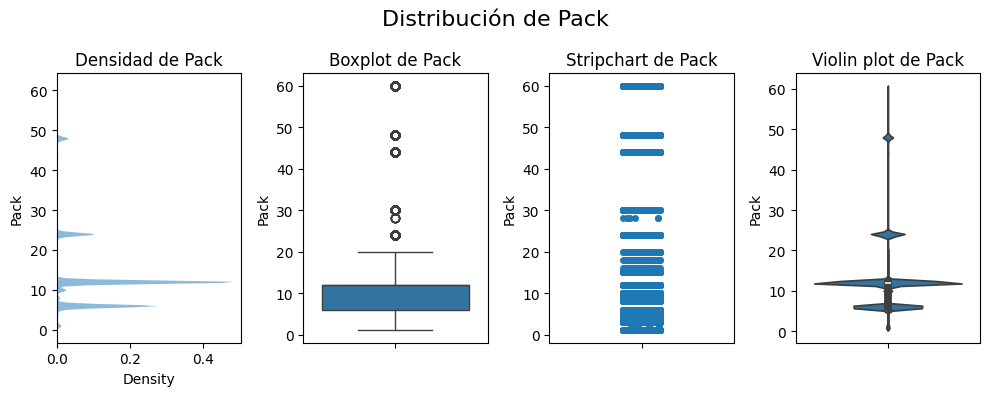

Bottle Volume (ml)


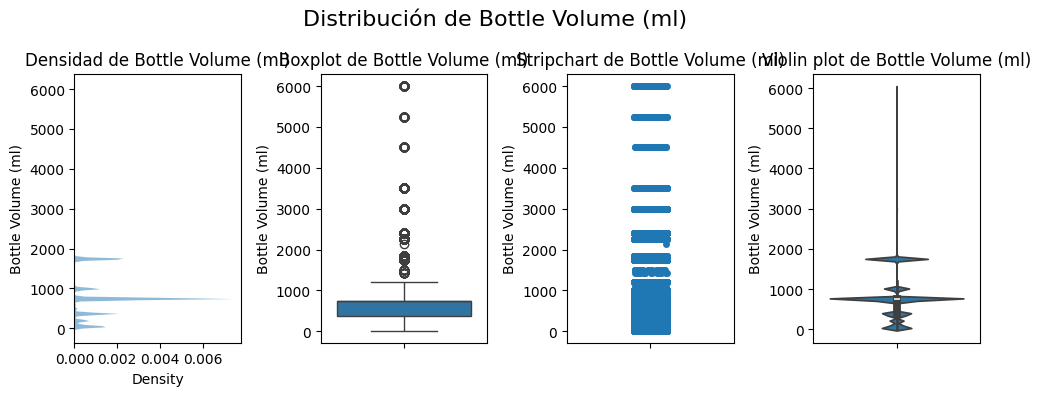

State Bottle Cost


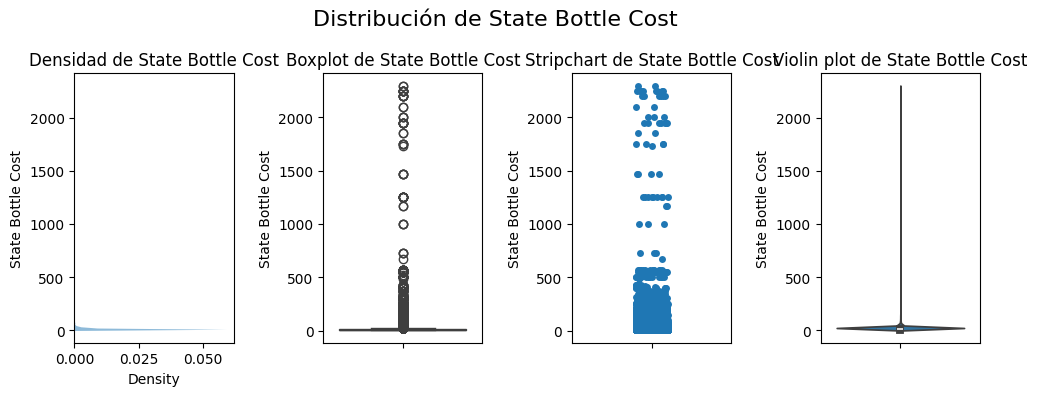

State Bottle Retail


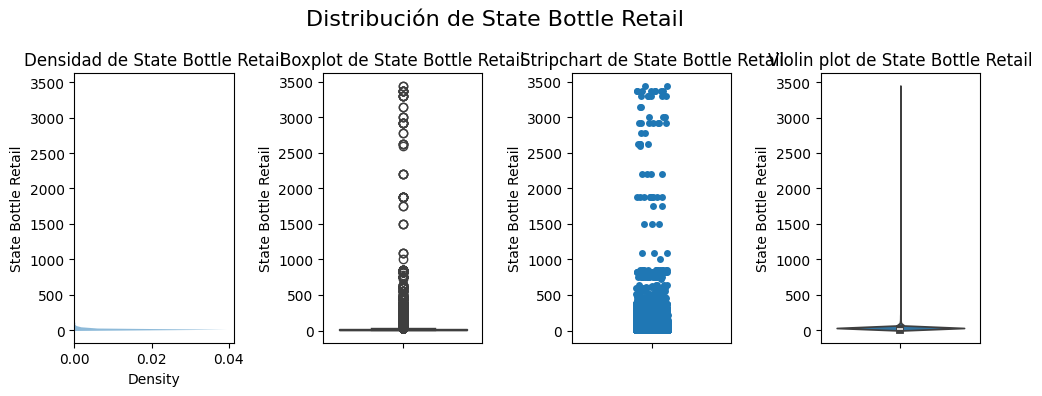

Bottles Sold


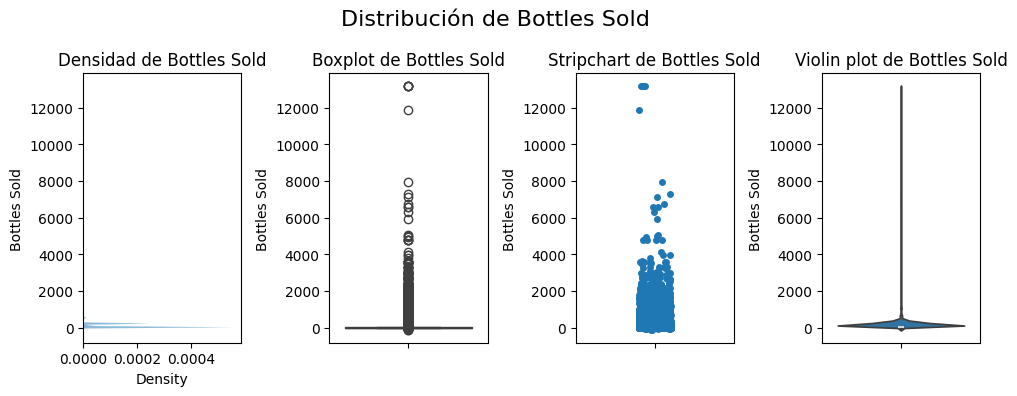

Sale (Dollars)


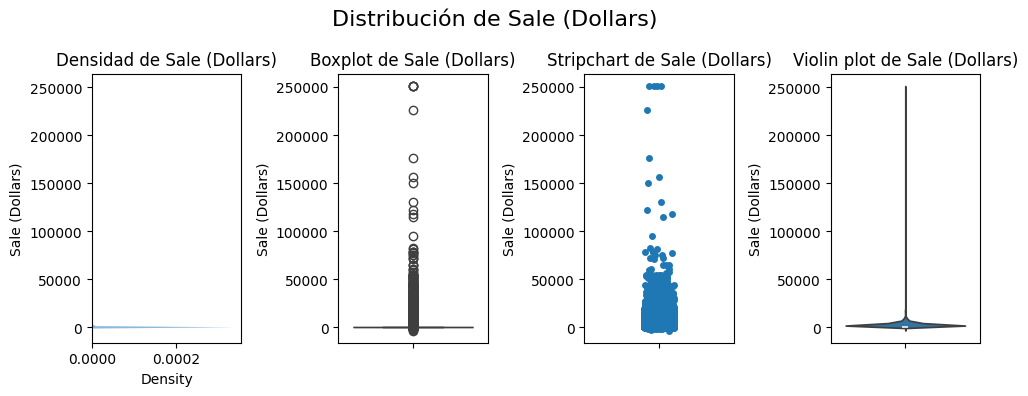

Volume Sold (Liters)


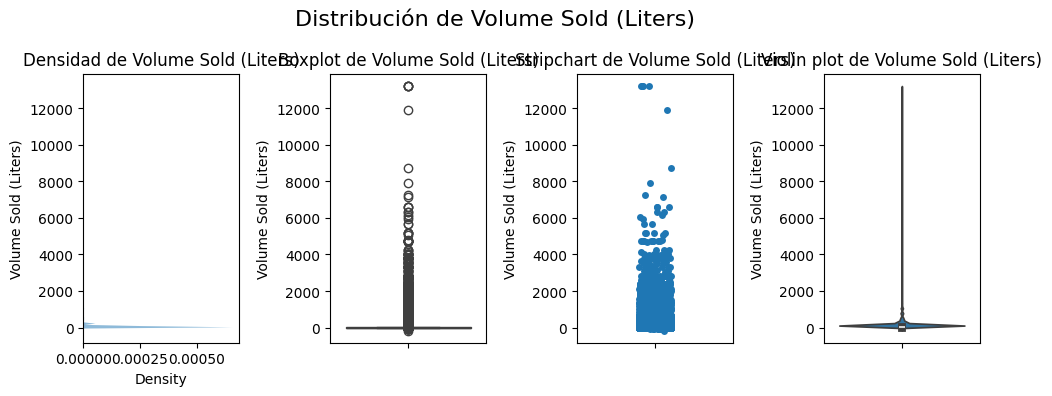

Volume Sold (Gallons)


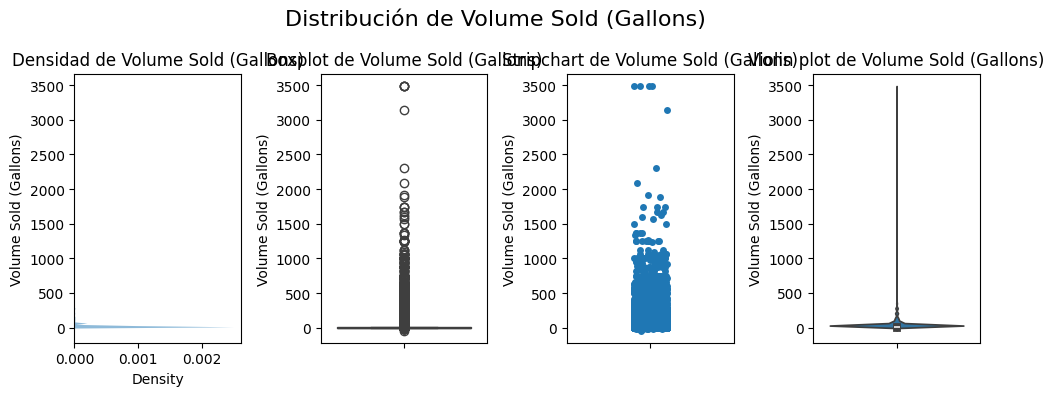

In [ ]:
# Análisis de variables numéricas
# Distribuciones: densidad, boxplot, astripchart, violinplot:
print("\n--- Frecuencias columnas numericas ---")
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de densidad, boxplot, stripchart y violin plot:
num_columns = iowa_liquor.select_dtypes(include=['int64', 'float64']).columns

for i in num_columns:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))

    # Histograma de densidad (KDE plot)
    sns.kdeplot(data=iowa_liquor, y=i, fill=True, common_norm=False, palette="crest",
                alpha=.5, linewidth=0, ax=axs[0])
    axs[0].set_title(f'Densidad de {i}')

    # Boxplot
    sns.boxplot(data=iowa_liquor, y=i, ax=axs[1])
    axs[1].set_title(f'Boxplot de {i}')

    # Stripchart
    sns.stripplot(y=i, data=iowa_liquor, ax=axs[2])
    axs[2].set_title(f'Stripchart de {i}')

    # Violin plot
    sns.violinplot(data=iowa_liquor, y=i, ax=axs[3])
    axs[3].set_title(f'Violin plot de {i}')

    fig.suptitle(f'Distribución de {i}', fontsize=16)
    fig.tight_layout()
    print(i)
    plt.show()


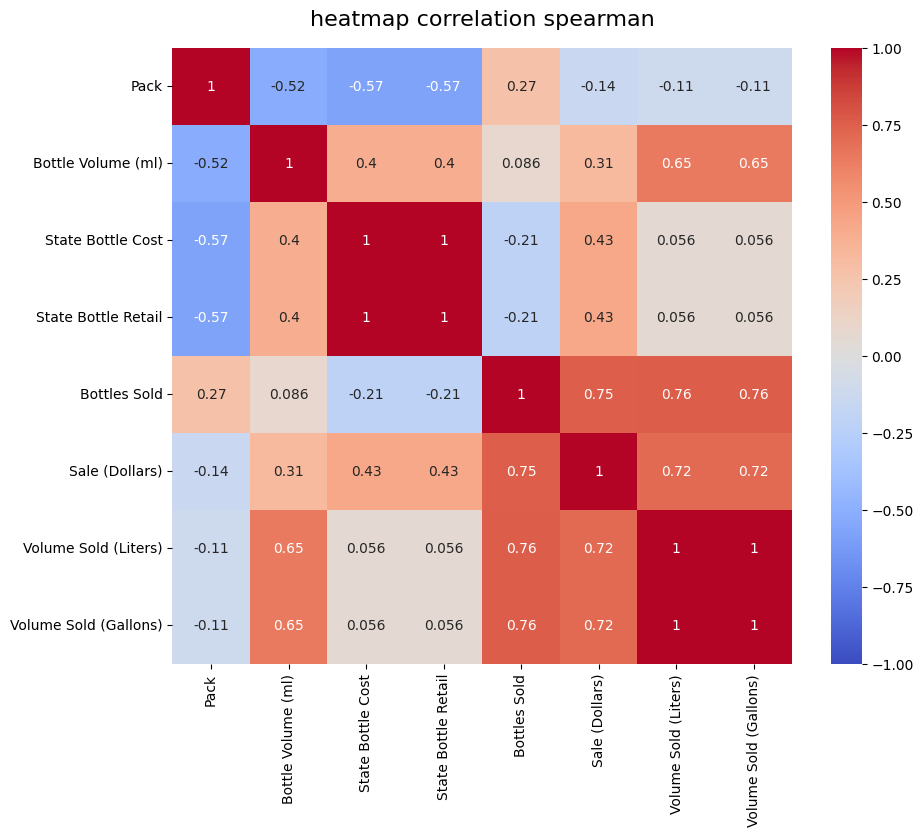

In [ ]:
# Calcula la correlación
corr_matrix = iowa_liquor[num_columns].corr(method='spearman')
# Crea el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('heatmap correlation spearman', fontdict={'fontsize':16}, pad=16)
plt.show()

### Exploración variables Categoricas

In [ ]:
# Descripción de las variables categóricas
print("\n--- Estadísticas descriptivas variables categoricas: ---")
iowa_liquor.describe(include=['object'])


--- Estadísticas descriptivas variables categoricas: ---


,Store Name,County,Category Name,Vendor Name,Item Description
count,3870101,3870101,3870101,3870101,3870101
unique,690,4,49,314,6233
top,HY-VEE #3 / BDI / DES MOINES,POLK,AMERICAN VODKAS,DIAGEO AMERICAS,TITOS HANDMADE VODKA
freq,73720,1921580,613998,612975,90370


In [ ]:
# Identificar valores únicos por columna
cat_columns = iowa_liquor.select_dtypes(include=['object']).columns

print("\n--- Valores únicos por columna: ---")
for column in cat_columns:
    unique_values = iowa_liquor[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos):\n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("...")


--- Valores únicos por columna: ---

Store Name (690 valores únicos):
['HILLTOP GROCERY' 'HY-VEE / WINDSOR HEIGHTS'
 'HY-VEE FOOD STORE #3 / DES MOINES' 'HY-VEE FOOD STORE / MARION'
 'GD XPRESS / DAVENPORT' 'PRAIRIE MEADOWS' 'THE DEPOT NORTH LIBERTY'
 'HY-VEE FOOD STORE #2 / IOWA CITY' 'QUIK TRIP #500 / HUBBELL DM' 'SAUCE']
...

County (4 valores únicos):
['SCOTT' 'POLK' 'LINN' 'JOHNSON']

Category Name (49 valores únicos):
['CANADIAN WHISKIES' 'IMPORTED BRANDIES' 'IRISH WHISKIES'
 'AMERICAN VODKAS' 'AMERICAN SCHNAPPS' 'FLAVORED RUM'
 'IMPORTED CORDIALS & LIQUEURS' 'MIXTO TEQUILA' 'CREAM LIQUEURS'
 'WHISKEY LIQUEUR']
...

Vendor Name (314 valores únicos):
['CONSTELLATION BRANDS INC' 'MOET HENNESSY USA' 'PERNOD RICARD USA'
 'LUXCO INC' 'BACARDI USA INC' 'DIAGEO AMERICAS' 'HOOD RIVER DISTILLERS'
 'MHW LTD' 'SAZERAC COMPANY  INC' 'WILLIAM GRANT & SONS INC']
...

Item Description (6233 valores únicos):
['BLACK VELVET' 'HENNESSY VS' 'JAMESON' 'HAWKEYE VODKA'
 'ARROW PEPPERMINT SCHNAPPS' 'P


--- Frecuencias columnas categoricas ---
*************************************************
Variable = Store Name
*************************************************
                                                    Frecuencias Relativas  \
Store Name                                                                  
HY-VEE #3 / BDI / DES MOINES                                         0.02   
CENTRAL CITY 2                                                       0.02   
CENTRAL CITY LIQUOR, INC.                                            0.02   
HY-VEE #7 / CEDAR RAPIDS                                             0.01   
HY-VEE WINE AND SPIRITS / BETTENDORF                                 0.01   
BENZ DISTRIBUTING                                                    0.01   
HY-VEE FOOD STORE / CORALVILLE                                       0.01   
HY-VEE FOOD STORE #2 / STATE ANKENY                                  0.01   
HY-VEE #4 / WDM                                                   

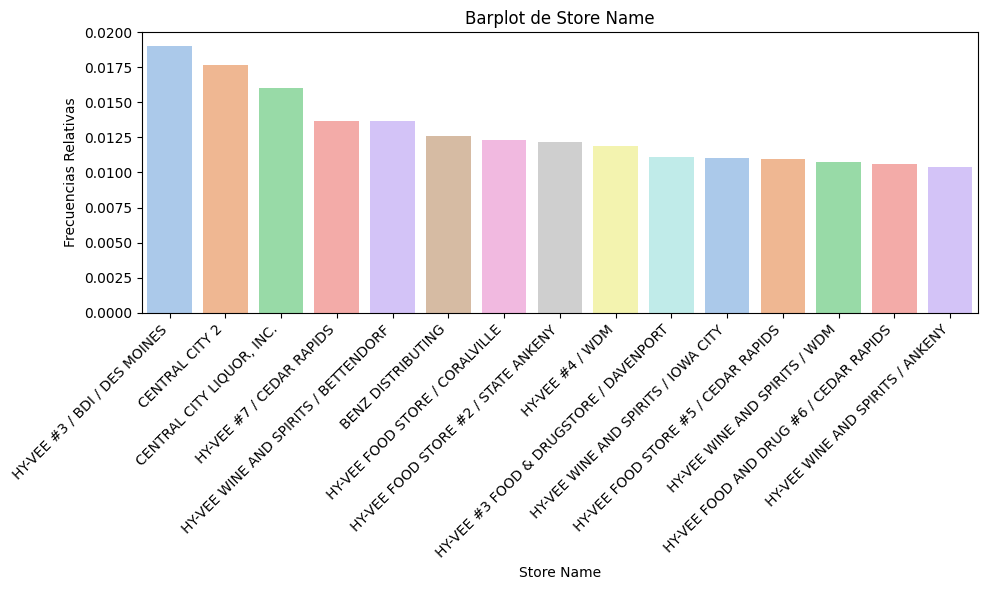

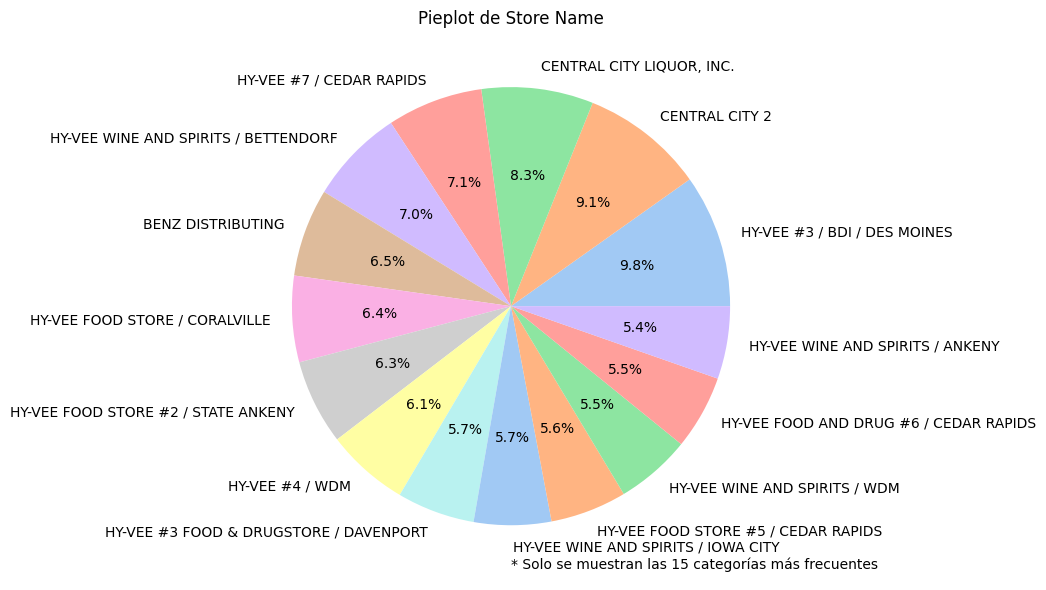

*************************************************
Variable = County
*************************************************
         Frecuencias Relativas  Frecuencias Absolutas
County                                               
POLK                      0.50                1921580
LINN                      0.22                 851490
SCOTT                     0.15                 595691
JOHNSON                   0.13                 501340


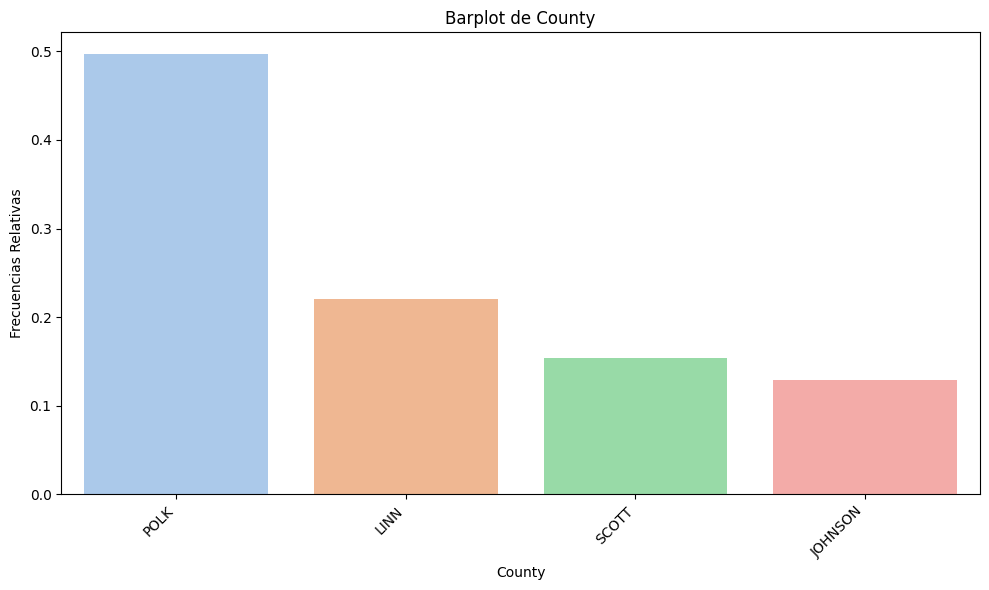

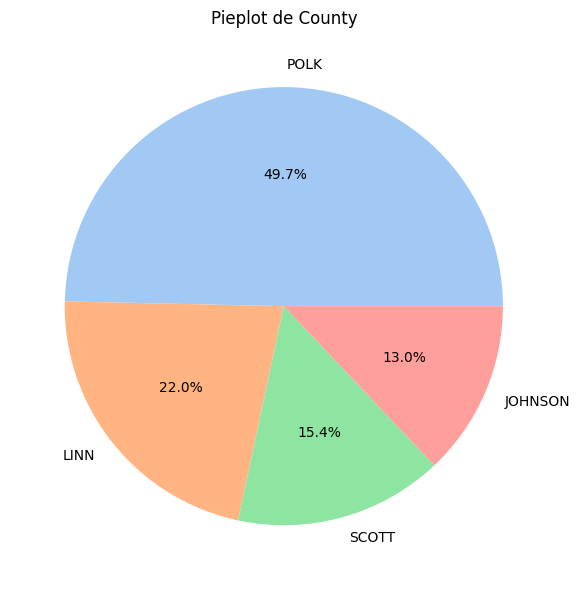

*************************************************
Variable = Category Name
*************************************************
                                      Frecuencias Relativas  \
Category Name                                                 
AMERICAN VODKAS                                        0.16   
CANADIAN WHISKIES                                      0.08   
STRAIGHT BOURBON WHISKIES                              0.07   
WHISKEY LIQUEUR                                        0.05   
AMERICAN FLAVORED VODKA                                0.05   
100% AGAVE TEQUILA                                     0.04   
SPICED RUM                                             0.04   
BLENDED WHISKIES                                       0.04   
IMPORTED VODKAS                                        0.03   
COCKTAILS/RTD                                          0.03   
IMPORTED BRANDIES                                      0.03   
AMERICAN BRANDIES                                      0

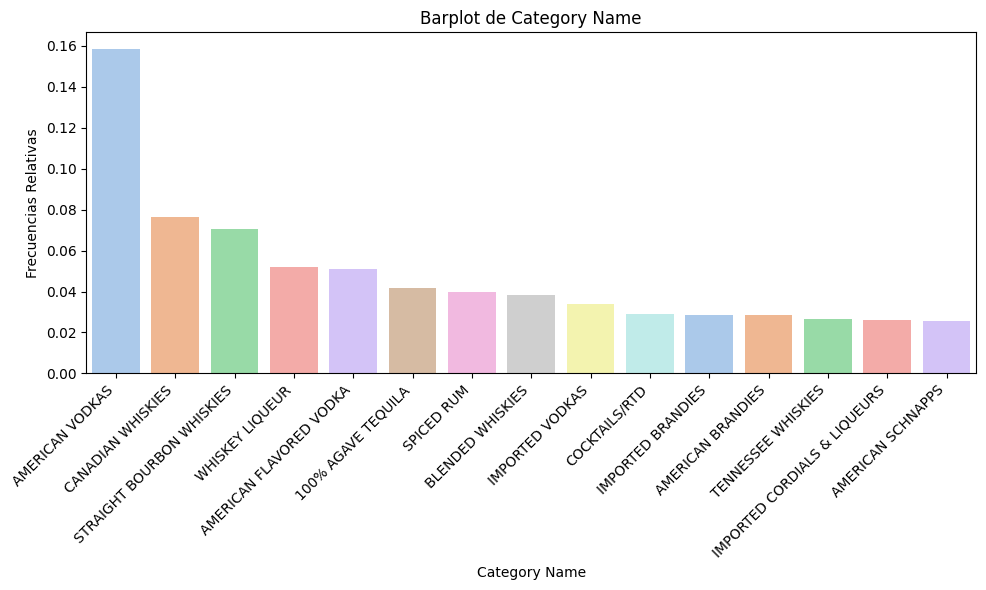

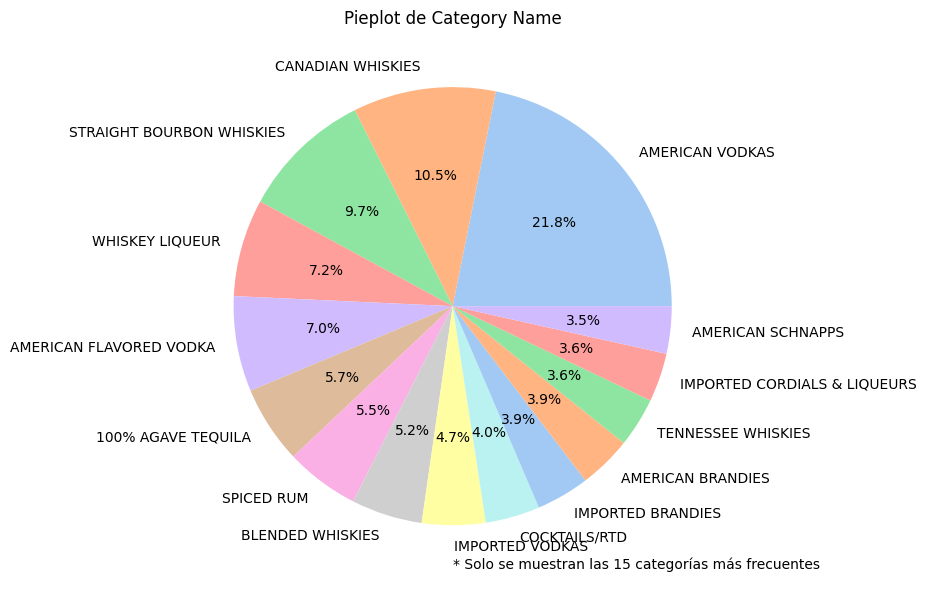

*************************************************
Variable = Vendor Name
*************************************************
                                                    Frecuencias Relativas  \
Vendor Name                                                                 
DIAGEO AMERICAS                                                      0.16   
SAZERAC COMPANY  INC                                                 0.11   
JIM BEAM BRANDS                                                      0.08   
HEAVEN HILL BRANDS                                                   0.06   
LUXCO INC                                                            0.06   
PERNOD RICARD USA                                                    0.06   
E & J GALLO WINERY                                                   0.05   
BACARDI USA INC                                                      0.05   
PROXIMO                                                              0.04   
BROWN FORMAN CORP.            

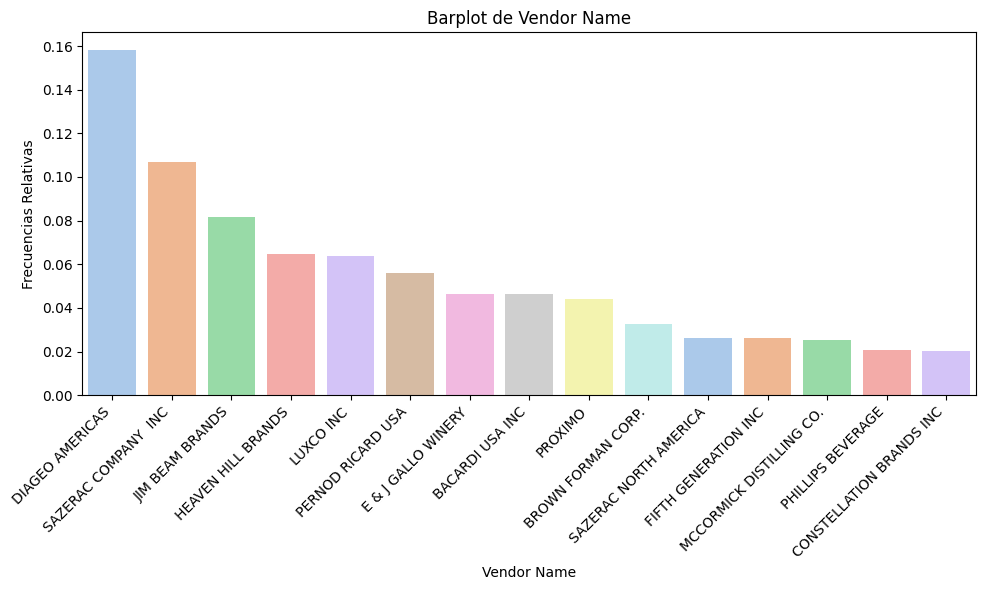

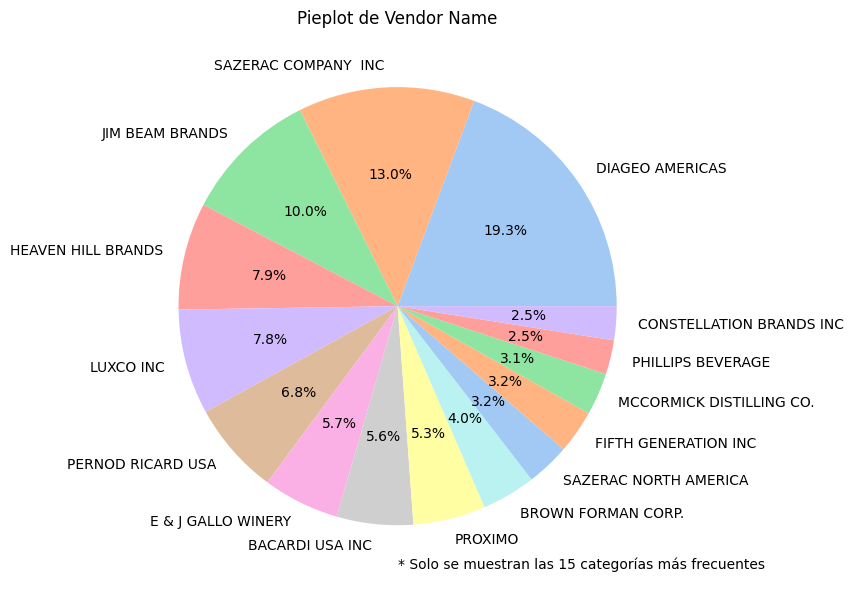

Se truncaron las últimas líneas 5000 del resultado de transmisión.
BURNETTS TROPICAL PUNCH                                               367  
UNCLE NEAREST 1884 SMALL BATCH WHISKEY                                367  
TRES GENERACIONES REPOSADO                                            366  
BIRD DOG BLACKBERRY MINI                                              366  
PEARL PET                                                             366  
JIM BEAM ORANGE MINI                                                  365  
99 BRAND CHERRY LIMEADE PET MINI                                      365  
ARDBEG WEE BEASTIE                                                    364  
WESTERN SON WATERMELON VODKA                                          363  
OBAN 18YR                                                             363  
MARTELL VSSD                                                          362  
RUMCOQUI                                                              362  
CAPTAIN MORGAN WHITE 

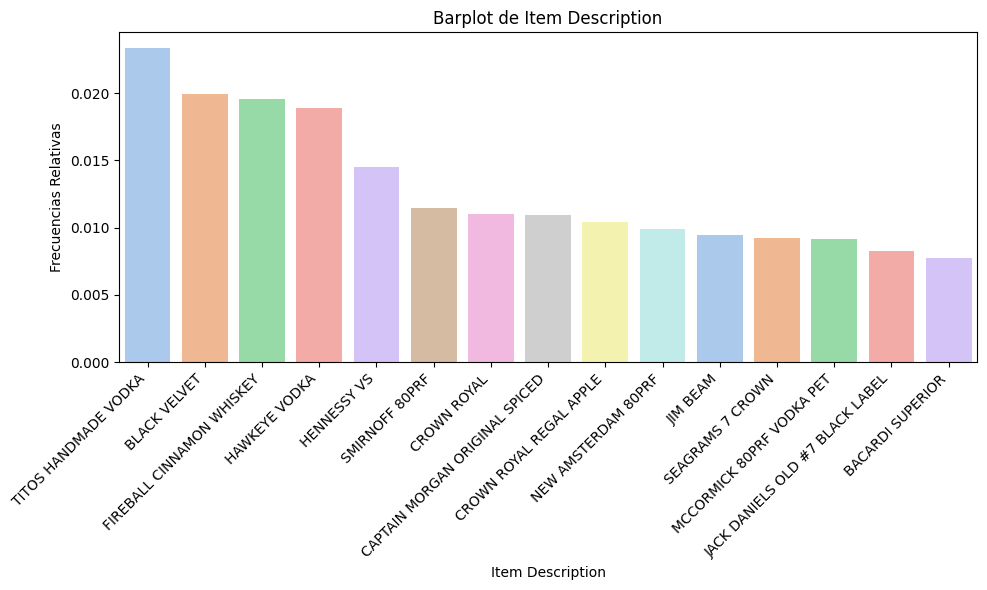

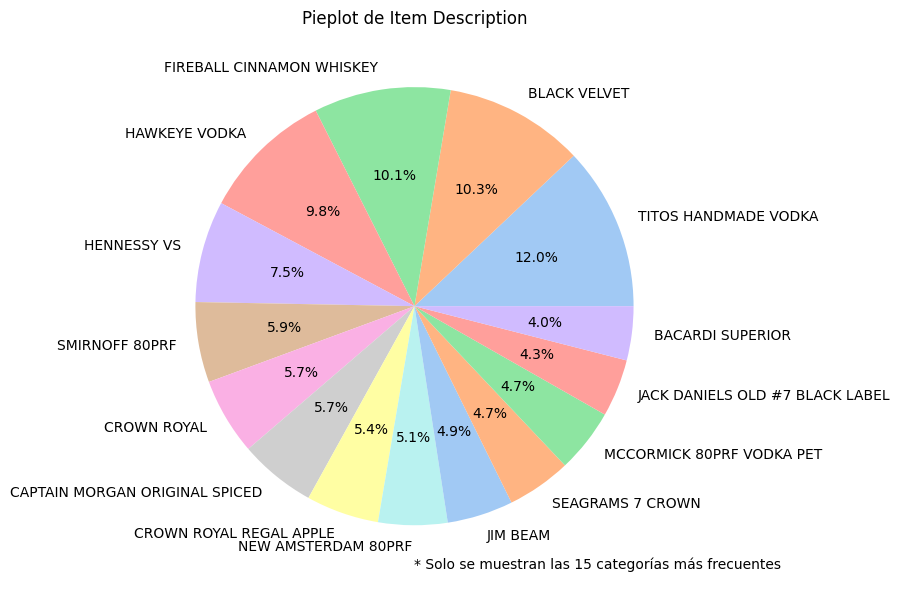

In [ ]:
# Gráficos y tablas de frecuencias de todas las variables cualitativas:

print("\n--- Frecuencias columnas categoricas ---")
for i in cat_columns:
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")

    # 1. La tabla de frecuencias de la variable i
    pct = pd.DataFrame(iowa_liquor[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = iowa_liquor[i].value_counts()
    print(pct)

    # Limitamos a las 10 categorías más frecuentes si hay más de 10
    n = 15 # Numero de categorias a mostrar
    if len(pct) > n:
        pct = pct.head(n)
        other_label = 'Otros'
    else:
        other_label = None

    # 2. Barplot de la variable i
    colors = sns.color_palette('pastel')[:n]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=pct.index, y='Frecuencias Relativas',palette=colors, data=pct)
    plt.title(f'Barplot de {i}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # 3. Pieplot de la variable i
    frec_abs = pct['Frecuencias Absolutas']
    labels = pct.index

    colors = sns.color_palette('pastel')[:len(labels)]
    plt.figure(figsize=(10, 6))
    plt.pie(frec_abs, labels=labels, colors=colors, autopct='%.1f%%')
    plt.title(f'Pieplot de {i}')
    if other_label:
        plt.text(0, -1.2, f'* Solo se muestran las {n} categorías más frecuentes', fontsize=10)
    plt.tight_layout()
    plt.show()


--- Análisis temporal ---


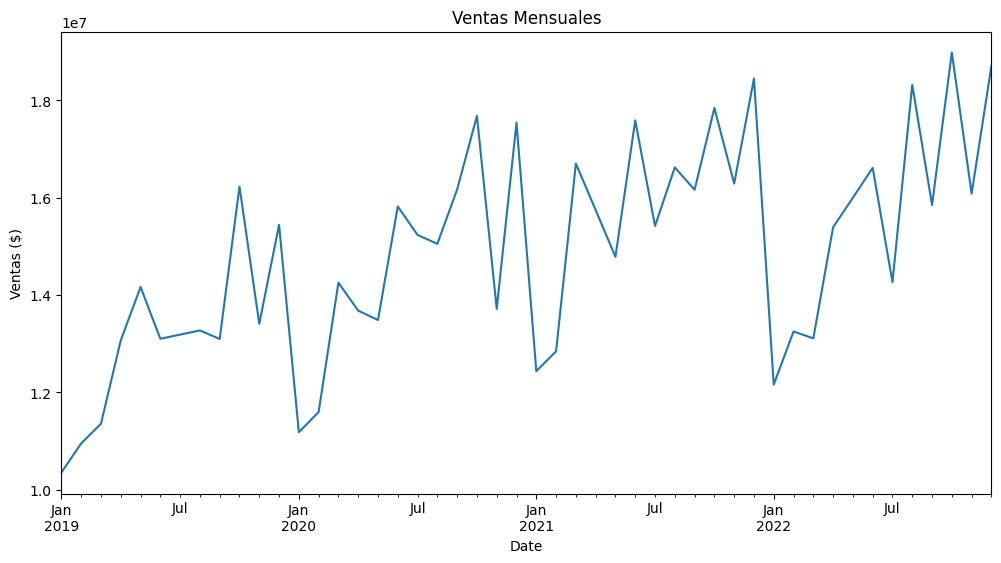

In [ ]:
# Análisis temporal
print("\n--- Análisis temporal ---")
iowa_liquor.set_index('Date', inplace=True)
monthly_sales = iowa_liquor.resample('M')['Sale (Dollars)'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Ventas Mensuales')
plt.ylabel('Ventas ($)')
plt.show()

# **CONDADO LINN**

    

In [ ]:
# Filtrar el DataFrame 'iowa_liquor' para seleccionar solo las filas donde el condado ('County') es 'LINN'.
df_linn = iowa_liquor[iowa_liquor['County'] == 'LINN']

# Eliminar la columna 'County' del DataFrame 'df_linn' ya que todos los registros pertenecen al mismo condado.
df_linn.drop('County', axis=1, inplace=True)

# Imprimir la forma (número de filas y columnas) del DataFrame 'df_linn'.
print(df_linn.shape)

# Mostrar las primeras 2 filas del DataFrame 'df_linn' para una vista previa.
df_linn.head(2)

(851490, 12)


,Store Name,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
Date,,,,,,,,,,,,
2019-08-09,HY-VEE FOOD STORE / MARION,AMERICAN VODKAS,LUXCO INC,HAWKEYE VODKA,6,1750,7.17,10.76,12,129.12,21.00,5.54
2019-03-11,HY-VEE FOOD STORE / MARION,CANADIAN WHISKIES,DIAGEO AMERICAS,CROWN ROYAL BLACK,12,750,17.00,25.50,6,153.00,4.50,1.18


Store Name
BENZ DISTRIBUTING                        14598796.12
WILKIE LIQUORS                           14462353.96
SAM'S CLUB 8162 / CEDAR RAPIDS           12913041.21
HY-VEE #7 / CEDAR RAPIDS                  8352046.49
HY-VEE FOOD STORE #5 / CEDAR RAPIDS       6000795.55
HY-VEE FOOD STORE / MARION                5355202.97
HY-VEE FOOD STORE #3 / CEDAR RAPIDS       4768639.64
HY-VEE FOOD AND DRUG #6 / CEDAR RAPIDS    4419925.09
HY-VEE DRUGSTORE #5 / CEDAR RAPIDS        3992343.24
HY-VEE FOOD STORE #1 / CEDAR RAPIDS       3662307.93
WAL-MART 3630 / MARION                    2954334.00
HY-VEE / DRUGTOWN #1 / CEDAR RAPIDS       2585496.81
LEO1  /  CEDAR RAPIDS                     1906022.53
POINT LIQUOR & TOBACCO                    1903669.67
HY-VEE DRUGSTORE #6 / CEDAR RAPIDS        1834310.44
Name: Sale (Dollars), dtype: float64


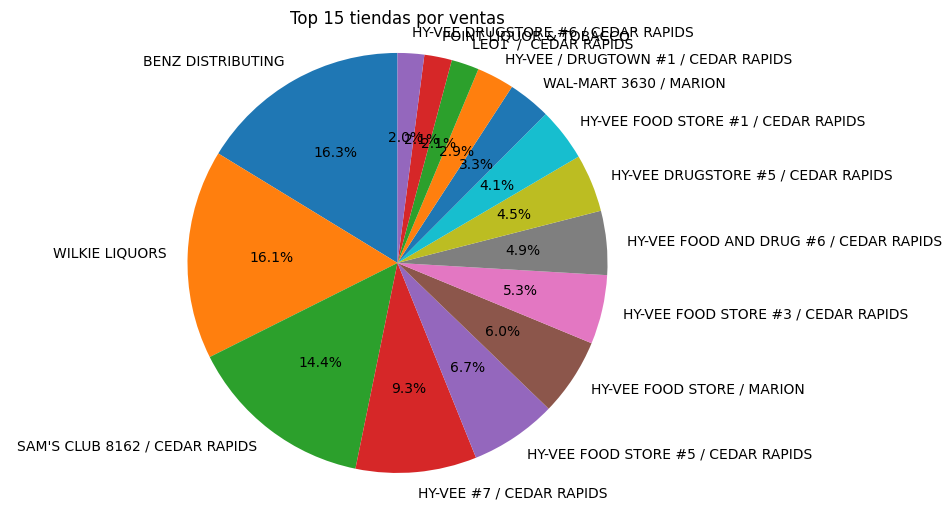

In [ ]:
# Agrupar por 'Nombre de la tienda' y sumar las 'Ventas (Dólares)'
store_sales = df_linn.groupby('Store Name')['Sale (Dollars)'].sum()

# Ordenar por 'Ventas (Dólares)' en orden descendente
store_sales_sorted = store_sales.sort_values(ascending=False)

# Imprimir las 15 tiendas con mayores ventas
print(store_sales_sorted.head(15))

# Mostrar las 15 tiendas con mayores ventas (redundante, se puede eliminar si ya se imprime)
# store_sales_sorted.head(15)

# Seleccionar las N tiendas principales para el gráfico de pastel (por ejemplo, las 10 principales)
top_n = 15  # Número de tiendas principales a mostrar
top_stores = store_sales_sorted.head(top_n)

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura si es necesario
plt.pie(top_stores, labels=top_stores.index, autopct='%1.1f%%', startangle=90)
plt.title(f'Top {top_n} tiendas por ventas')
plt.axis('equal')  # Asegura un gráfico de pastel circular
plt.show()


--- Análisis de ventas ---


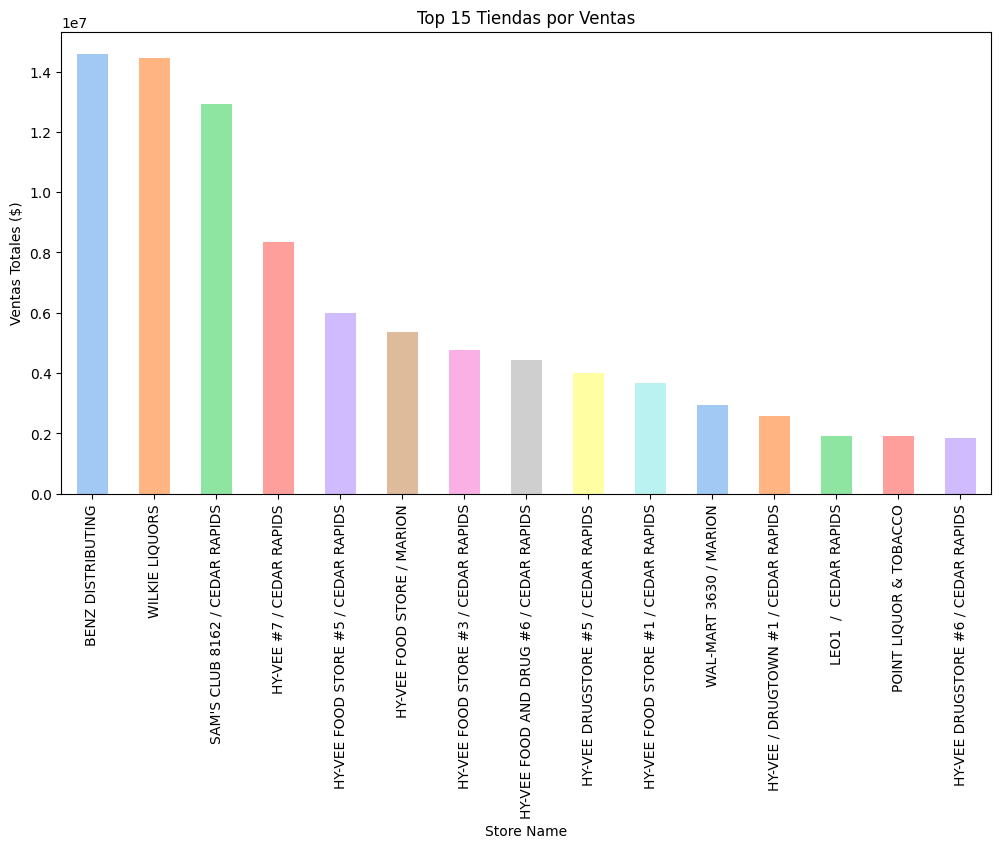

In [ ]:
# Análisis de ventas
print("\n--- Análisis de ventas ---")

# Crear una figura para el gráfico de barras.
plt.figure(figsize=(12, 6))

# Agrupar por 'Nombre de la tienda', sumar las 'Ventas (Dólares)', ordenar en orden descendente
# y seleccionar las 15 tiendas principales. Luego, graficar como un gráfico de barras.
df_linn.groupby('Store Name')['Sale (Dollars)'].sum().sort_values(ascending=False).head(15).plot(kind='bar', color=colors)

# Agregar un título al gráfico.
plt.title('Top 15 Tiendas por Ventas')

# Agregar una etiqueta al eje y.
plt.ylabel('Ventas Totales ($)')

# Rotar las etiquetas del eje x 90 grados para una mejor legibilidad.
plt.xticks(rotation=90)

# Mostrar el gráfico generado.
plt.show()


--- Análisis temporal ---


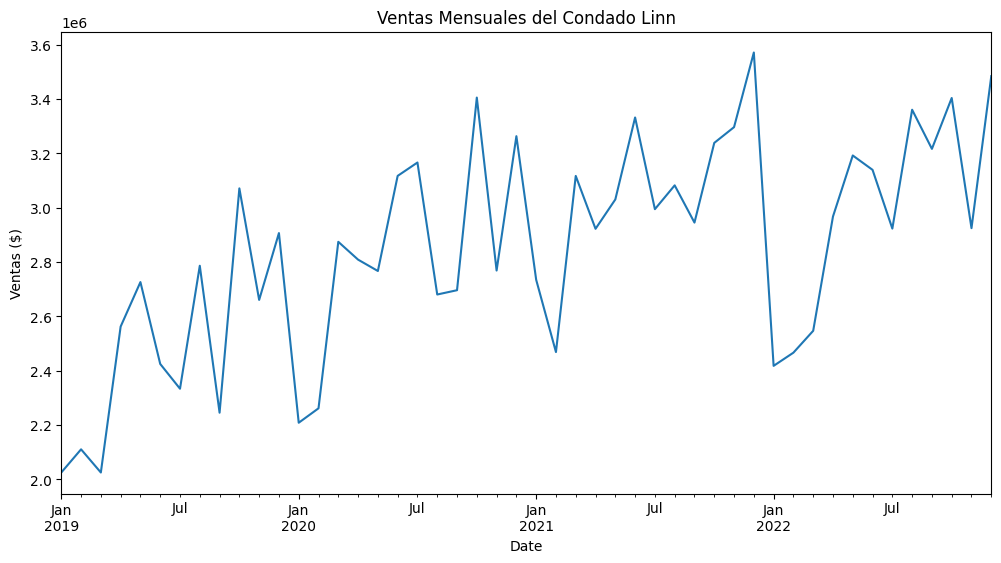

In [ ]:
# Análisis temporal
# Se reinicia el índice del DataFrame 'df_linn' para que 'Date' sea una columna regular.
df_linn = df_linn.reset_index()

print("\n--- Análisis temporal ---")

# Se establece la columna 'Date' como índice del DataFrame.
df_linn.set_index('Date', inplace=True)

# Se remuestrean los datos a nivel mensual ('M') y se suman las ventas ('Sale (Dollars)') para cada mes.
monthly_sales = df_linn.resample('M')['Sale (Dollars)'].sum()

# Se crea una figura para el gráfico.
plt.figure(figsize=(12, 6))

# Se grafica la serie temporal de ventas mensuales.
monthly_sales.plot()

# Se agrega un título al gráfico.
plt.title('Ventas Mensuales del Condado Linn')

# Se agrega una etiqueta al eje y.
plt.ylabel('Ventas ($)')

# Se muestra el gráfico generado.
plt.show()

In [ ]:
# # Guarda los datos de ventas mensuales en un archivo CSV llamado 'monthly_sales.csv'.
# # index=False indica que no se debe incluir el índice en el archivo CSV.
# monthly_sales.to_csv('monthly_sales.csv', index=False)

# # Descarga el archivo 'monthly_sales.csv' desde Google Colab a tu computadora.
# files.download('monthly_sales.csv')


--- Relación entre variables ---


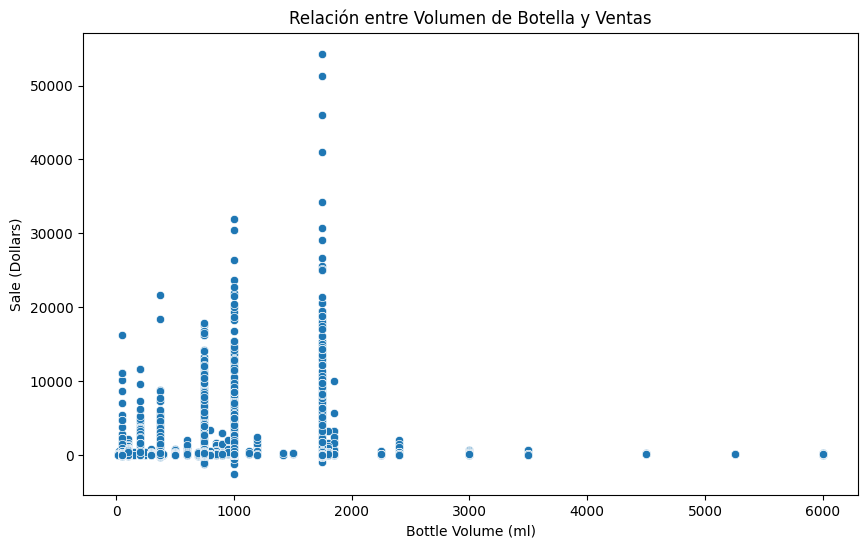

In [ ]:
# Relación entre variables Volumen de Botella y Ventas
print("\n--- Relación entre variables ---")

# Crea una figura para el gráfico de dispersión.
plt.figure(figsize=(10, 6))

# Crea un gráfico de dispersión utilizando seaborn para visualizar la relación entre
# 'Volumen de Botella (ml)' y 'Ventas (Dólares)' en el DataFrame 'df_linn'.
sns.scatterplot(x='Bottle Volume (ml)', y='Sale (Dollars)', data=df_linn)

# Agrega un título al gráfico.
plt.title('Relación entre Volumen de Botella y Ventas')

# Muestra el gráfico generado.
plt.show()

In [ ]:
# Agrupa los datos por 'Volumen de Botella (ml)' y suma las 'Ventas (Dólares)' para cada volumen.
volume_sales = df_linn.groupby('Bottle Volume (ml)')['Sale (Dollars)'].sum()

# Crea un DataFrame a partir del resultado, con columnas 'Volumen de Botella (ml)' y 'Ventas Totales'.
volume_sales_table = pd.DataFrame({'Bottle Volume (ml)': volume_sales.index, 'Total Sales': volume_sales.values})

# Muestra la tabla.
print(volume_sales_table)

    Bottle Volume (ml)  Total Sales
0                   20      4474.20
1                   25      2250.00
2                   50   4354383.69
3                  100   1819046.08
4                  150      1379.32
5                  200   3740302.41
6                  250      1354.50
7                  300     53147.36
8                  375  10569042.81
9                  400       972.00
10                 500    196744.07
11                 600    100408.58
12                 603      3844.00
13                 700     16928.37
14                 750  56926281.57
15                 800     39601.99
16                 850     23594.94
17                 900     15606.42
18                 950     13902.21
19                1000  27534118.48
20                1125      1642.44
21                1200     78039.02
22                1420       511.50
23                1500       691.20
24                1750  30911980.91
25                1800     30540.01
26                1850     4


--- Análisis por categoría ---


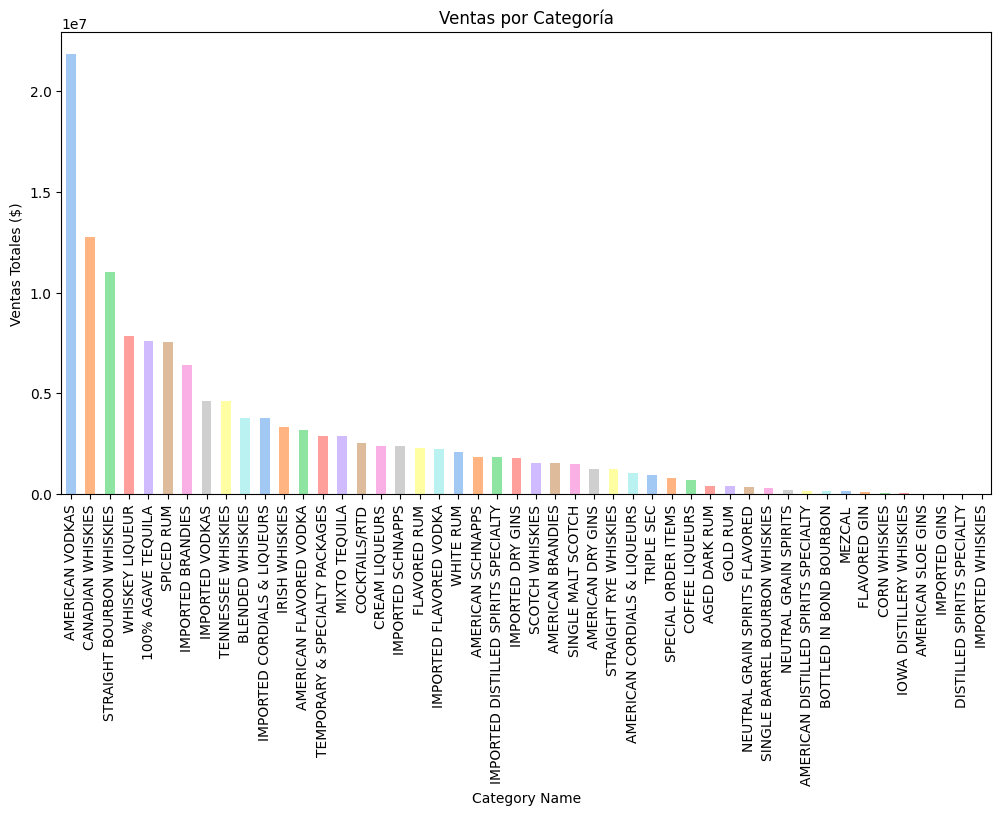

In [ ]:
# Análisis por categoría
print("\n--- Análisis por categoría ---")

# Crea una figura para el gráfico de barras.
plt.figure(figsize=(12, 6))

# Agrupa los datos por 'Nombre de Categoría', suma las 'Ventas (Dólares)',
# ordena en orden descendente y grafica como un gráfico de barras.
df_linn.groupby('Category Name')['Sale (Dollars)'].sum().sort_values(ascending=False).plot(kind='bar', color=colors)

# Agrega un título al gráfico.
plt.title('Ventas por Categoría')

# Agrega una etiqueta al eje y.
plt.ylabel('Ventas Totales ($)')

# Rota las etiquetas del eje x 90 grados para una mejor legibilidad.
plt.xticks(rotation=90)

# Muestra el gráfico generado.
plt.show()

In [ ]:
# Agrupa los datos por 'Nombre de Categoría' y suma las 'Ventas (Dólares)' para cada categoría.
volume_sales = df_linn.groupby('Category Name')['Sale (Dollars)'].sum()

# Ordena las categorías por 'Ventas (Dólares)' en orden descendente.
volume_sales = volume_sales.sort_values(ascending=False)

# Crea un DataFrame a partir del resultado, con columnas 'Nombre de Categoría' y 'Ventas Totales'.
volume_sales_table = pd.DataFrame({'Category Name': volume_sales.index, 'Total Sales': volume_sales.values})

# Muestra la tabla.
print(volume_sales_table)

                           Category Name  Total Sales
0                        AMERICAN VODKAS  21818035.97
1                      CANADIAN WHISKIES  12758381.05
2              STRAIGHT BOURBON WHISKIES  11008482.23
3                        WHISKEY LIQUEUR   7835315.38
4                     100% AGAVE TEQUILA   7622265.85
5                             SPICED RUM   7563438.05
6                      IMPORTED BRANDIES   6403762.04
7                        IMPORTED VODKAS   4639736.03
8                     TENNESSEE WHISKIES   4628189.03
9                       BLENDED WHISKIES   3801782.65
10          IMPORTED CORDIALS & LIQUEURS   3763381.16
11                        IRISH WHISKIES   3344949.47
12               AMERICAN FLAVORED VODKA   3168234.39
13        TEMPORARY & SPECIALTY PACKAGES   2903404.47
14                         MIXTO TEQUILA   2895827.88
15                         COCKTAILS/RTD   2528660.35
16                        CREAM LIQUEURS   2405604.15
17                     IMPOR

In [ ]:
# Análisis de margen
print("\n--- Análisis de margen ---")

# Calcula el margen de beneficio para cada producto utilizando la fórmula:
# Margen = (Precio de Venta al Público - Costo de la Botella) / Costo de la Botella
df_linn['Margen'] = (df_linn['State Bottle Retail'] - df_linn['State Bottle Cost']) / df_linn['State Bottle Cost']

# Imprime estadísticas descriptivas del margen de beneficio, como la media, desviación estándar, mínimo, máximo, etc.
print("\nEstadísticas de Margen:")
print(df_linn['Margen'].describe())


--- Análisis de margen ---

Estadísticas de Margen:
count   851490.00
mean         0.50
std          0.01
min          0.08
25%          0.50
50%          0.50
75%          0.50
max          3.43
Name: Margen, dtype: float64



--- Eficiencia de ventas ---


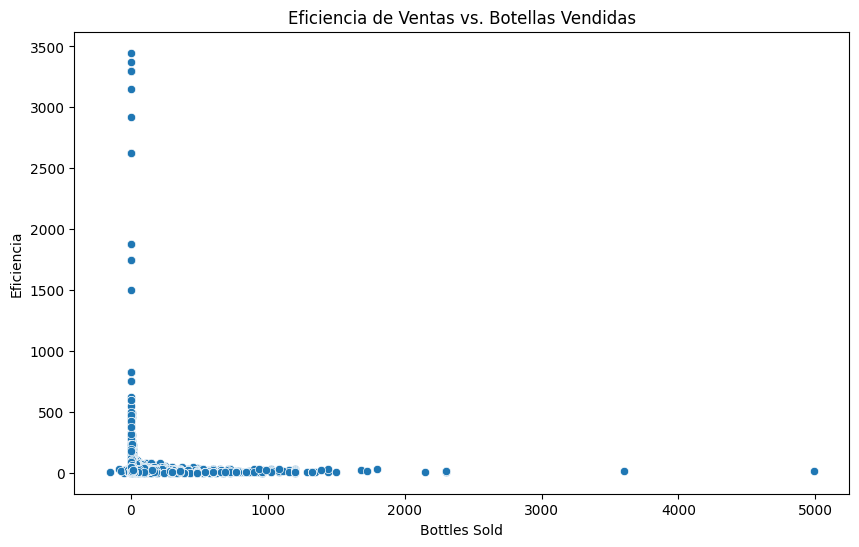

In [ ]:
# Eficiencia de ventas
print("\n--- Eficiencia de ventas ---")

# Calcula la eficiencia de ventas para cada producto:
# Eficiencia = Ventas (Dólares) / Botellas Vendidas
df_linn['Eficiencia'] = df_linn['Sale (Dollars)'] / df_linn['Bottles Sold']

# Crea una figura para el gráfico de dispersión.
plt.figure(figsize=(10, 6))

# Crea un gráfico de dispersión utilizando seaborn para visualizar la relación entre
# 'Botellas Vendidas' y 'Eficiencia' en el DataFrame 'df_linn'.
sns.scatterplot(x='Bottles Sold', y='Eficiencia', data=df_linn)

# Agrega un título al gráfico.
plt.title('Eficiencia de Ventas vs. Botellas Vendidas')

# Muestra el gráfico generado.
plt.show()

In [ ]:
# Análisis de outliers
print("\n--- Análisis detallado de Outliers ---")

# Define una función para analizar outliers en una columna específica de un DataFrame.
def analyze_outliers(df, column):
    """
    Analiza los outliers en una columna específica de un DataFrame utilizando el método IQR.

    Args:
        df: El DataFrame a analizar.
        column: El nombre de la columna a analizar.
    """
    # Calcula los límites para los outliers usando el método IQR (Rango Intercuartílico).
    Q1 = df[column].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[column].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango Intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior para outliers
    upper_bound = Q3 + 1.5 * IQR  # Límite superior para outliers

    # Identifica los outliers utilizando los límites calculados.
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Imprime estadísticas sobre los outliers.
    print(f"\nAnálisis de outliers para {column}:")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Rango de valores normales: {lower_bound:.2f} - {upper_bound:.2f}")

    # Si hay outliers, imprime estadísticas descriptivas de los outliers.
    if len(outliers) > 0:
        print("\nEstadísticas de los outliers:")
        print(outliers[column].describe())


# Analiza outliers para columnas numéricas relevantes.
numeric_columns = ['Sale (Dollars)', 'Bottles Sold', 'State Bottle Cost', 'State Bottle Retail']
for column in numeric_columns:
    analyze_outliers(df_linn, column)


--- Análisis detallado de Outliers ---

Análisis de outliers para Sale (Dollars):
Número de outliers: 54108
Porcentaje de outliers: 6.35%
Rango de valores normales: -141.90 - 344.34

Estadísticas de los outliers:
count   54108.00
mean     1069.50
std      1520.45
min     -2519.16
25%       423.36
50%       588.24
75%      1020.60
max     54312.96
Name: Sale (Dollars), dtype: float64

Análisis de outliers para Bottles Sold:
Número de outliers: 51542
Porcentaje de outliers: 6.05%
Rango de valores normales: -10.50 - 25.50

Estadísticas de los outliers:
count   51542.00
mean       87.88
std       103.08
min      -156.00
25%        48.00
50%        48.00
75%        96.00
max      4992.00
Name: Bottles Sold, dtype: float64

Análisis de outliers para State Bottle Cost:
Número de outliers: 48130
Porcentaje de outliers: 5.65%
Rango de valores normales: -6.70 - 25.62

Estadísticas de los outliers:
count   48130.00
mean       37.46
std        36.07
min        25.63
25%        28.00
50%        30

In [ ]:
# Impacto de los outliers en las estadísticas
print("\n--- Impacto de los outliers en las estadísticas ---")

# Define una función para comparar las estadísticas de una columna con y sin outliers.
def stats_with_without_outliers(df, column):
    """
    Calcula y compara las estadísticas descriptivas de una columna con y sin outliers.

    Args:
        df: El DataFrame a analizar.
        column: El nombre de la columna a analizar.
    """
    # Calcula los límites para los outliers usando el método IQR.
    Q1 = df[column].quantile(0.25)  # Primer cuartil (25%)
    Q3 = df[column].quantile(0.75)  # Tercer cuartil (75%)
    IQR = Q3 - Q1  # Rango Intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior para outliers
    upper_bound = Q3 + 1.5 * IQR  # Límite superior para outliers

    # Crea un nuevo DataFrame sin outliers.
    df_without_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Imprime las estadísticas descriptivas con y sin outliers.
    print(f"\nEstadísticas para {column}:")
    print("Con outliers:")
    print(df[column].describe())
    print("\nSin outliers:")
    print(df_without_outliers[column].describe())


# Aplica la función a las columnas numéricas relevantes para comparar las estadísticas.
for col in numeric_columns:
    stats_with_without_outliers(df_linn, col)


--- Impacto de los outliers en las estadísticas ---

Estadísticas para Sale (Dollars):
Con outliers:
count   851490.00
mean       160.50
std        456.79
min      -2519.16
25%         40.44
50%         81.60
75%        162.00
max      54312.96
Name: Sale (Dollars), dtype: float64

Sin outliers:
count   797382.00
mean        98.82
std         77.92
min       -138.00
25%         37.17
50%         76.44
75%        140.16
max        344.34
Name: Sale (Dollars), dtype: float64

Estadísticas para Bottles Sold:
Con outliers:
count   851490.00
mean        12.57
std         32.31
min       -156.00
25%          3.00
50%          6.00
75%         12.00
max       4992.00
Name: Bottles Sold, dtype: float64

Sin outliers:
count   799948.00
mean         7.71
std          6.15
min         -8.00
25%          3.00
50%          6.00
75%         12.00
max         25.00
Name: Bottles Sold, dtype: float64

Estadísticas para State Bottle Cost:
Con outliers:
count   851490.00
mean        10.87
std         1


--- Patrones de venta por día de la semana ---


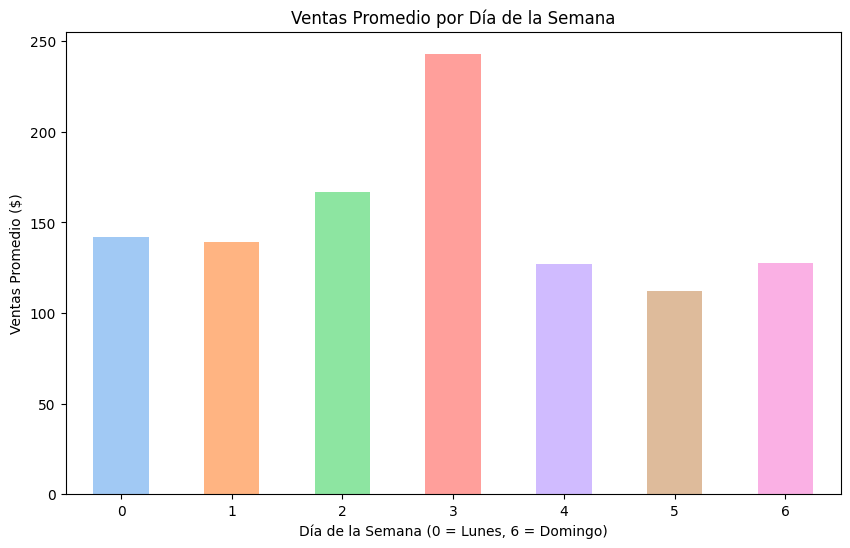

In [ ]:
# Patrones de venta por día de la semana
print("\n--- Patrones de venta por día de la semana ---")

# Crea una nueva columna 'Dia_Semana' que representa el día de la semana (0 = Lunes, 6 = Domingo).
df_linn['Dia_Semana'] = df_linn.index.dayofweek

# Agrupa los datos por 'Dia_Semana' y calcula el promedio de 'Ventas (Dólares)' para cada día.
ventas_por_dia = df_linn.groupby('Dia_Semana')['Sale (Dollars)'].mean()

# Crea una figura para el gráfico de barras.
plt.figure(figsize=(10, 6))

# Crea un gráfico de barras para visualizar las ventas promedio por día de la semana.
ventas_por_dia.plot(kind='bar', color=colors)

# Agrega un título al gráfico.
plt.title('Ventas Promedio por Día de la Semana')

# Agrega una etiqueta al eje x.
plt.xlabel('Día de la Semana (0 = Lunes, 6 = Domingo)')

# Agrega una etiqueta al eje y.
plt.ylabel('Ventas Promedio ($)')

# Evita la rotación de las etiquetas del eje x.
plt.xticks(rotation=0)

# Muestra el gráfico generado.
plt.show()

In [ ]:
# Agrupa los datos por 'Día de la Semana' y calcula el promedio de 'Ventas (Dólares)' para cada día.
volume_sales = df_linn.groupby('Dia_Semana')['Sale (Dollars)'].mean()

# (Línea redundante, se puede eliminar)
# volume_sales = df_linn.groupby('Dia_Semana')['Sale (Dollars)'].mean()

# Ordena los días de la semana por 'Ventas (Dólares)' en orden descendente.
volume_sales = volume_sales.sort_values(ascending=False)

# Crea un DataFrame a partir del resultado, con columnas 'Día de la Semana' y 'Ventas Totales'.
volume_sales_table = pd.DataFrame({'Dia_Semana': volume_sales.index, 'Total Sales': volume_sales.values})

# Muestra la tabla.
print(volume_sales_table)

   Dia_Semana  Total Sales
0           3       242.84
1           2       166.58
2           0       141.79
3           1       139.04
4           6       127.68
5           4       126.84
6           5       112.09



--- Análisis de la relación precio-volumen ---


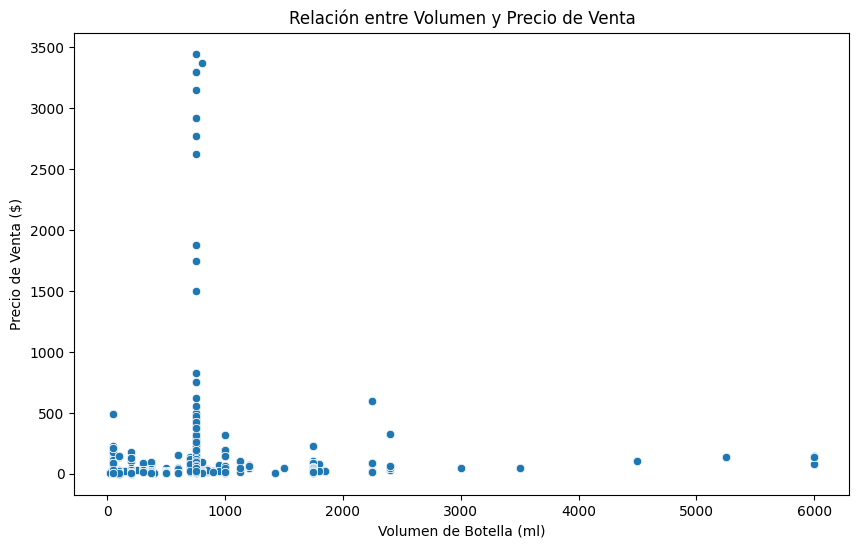

In [ ]:
# Análisis de la relación precio-volumen
print("\n--- Análisis de la relación precio-volumen ---")

# Crea una figura para el gráfico de dispersión.
plt.figure(figsize=(10, 6))

# Crea un gráfico de dispersión utilizando seaborn para visualizar la relación entre
# 'Volumen de Botella (ml)' y 'Precio de Venta al Público' en el DataFrame 'df_linn'.
sns.scatterplot(x='Bottle Volume (ml)', y='State Bottle Retail', data=df_linn)

# Agrega un título al gráfico.
plt.title('Relación entre Volumen y Precio de Venta')

# Agrega una etiqueta al eje x.
plt.xlabel('Volumen de Botella (ml)')

# Agrega una etiqueta al eje y.
plt.ylabel('Precio de Venta ($)')

# Muestra el gráfico generado.
plt.show()

# **MODELO**




In [ ]:
df_linn.head(5)

,Store Name,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margen,Eficiencia,Dia_Semana
Date,,,,,,,,,,,,,,,
2019-08-09,HY-VEE FOOD STORE / MARION,AMERICAN VODKAS,LUXCO INC,HAWKEYE VODKA,6,1750,7.17,10.76,12,129.12,21.00,5.54,0.50,10.76,4
2019-03-11,HY-VEE FOOD STORE / MARION,CANADIAN WHISKIES,DIAGEO AMERICAS,CROWN ROYAL BLACK,12,750,17.00,25.50,6,153.00,4.50,1.18,0.50,25.50,0
2019-03-04,HY-VEE FOOD STORE / MARION,IMPORTED CORDIALS & LIQUEURS,HOOD RIVER DISTILLERS,LUCID ABSINTHE,6,750,32.50,48.75,3,146.25,2.25,0.59,0.50,48.75,0
2019-03-12,SMOKIN' JOE'S #13 TOBACCO AND LIQUOR OUTLET,CANADIAN WHISKIES,DIAGEO AMERICAS,CROWN ROYAL VANILLA,24,375,8.00,12.00,2,24.00,0.75,0.19,0.50,12.00,1
2019-04-26,WAL-MART 3630 / MARION,CANADIAN WHISKIES,DIAGEO AMERICAS,CROWN ROYAL,24,375,8.00,12.00,24,288.00,9.00,2.37,0.50,12.00,4


In [ ]:
# Reinicia el índice para que 'Date' vuelva a ser una columna regular
# Esto se hace para que 'Date' pueda ser utilizada como una variable en el modelo.
df_linn_model = df_linn.reset_index()
df_linn_model.head(5)

,Date,Store Name,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Margen,Eficiencia,Dia_Semana
0,2019-08-09,HY-VEE FOOD STORE / MARION,AMERICAN VODKAS,LUXCO INC,HAWKEYE VODKA,6,1750,7.17,10.76,12,129.12,21.00,5.54,0.50,10.76,4
1,2019-03-11,HY-VEE FOOD STORE / MARION,CANADIAN WHISKIES,DIAGEO AMERICAS,CROWN ROYAL BLACK,12,750,17.00,25.50,6,153.00,4.50,1.18,0.50,25.50,0
2,2019-03-04,HY-VEE FOOD STORE / MARION,IMPORTED CORDIALS & LIQUEURS,HOOD RIVER DISTILLERS,LUCID ABSINTHE,6,750,32.50,48.75,3,146.25,2.25,0.59,0.50,48.75,0
3,2019-03-12,SMOKIN' JOE'S #13 TOBACCO AND LIQUOR OUTLET,CANADIAN WHISKIES,DIAGEO AMERICAS,CROWN ROYAL VANILLA,24,375,8.00,12.00,2,24.00,0.75,0.19,0.50,12.00,1
4,2019-04-26,WAL-MART 3630 / MARION,CANADIAN WHISKIES,DIAGEO AMERICAS,CROWN ROYAL,24,375,8.00,12.00,24,288.00,9.00,2.37,0.50,12.00,4


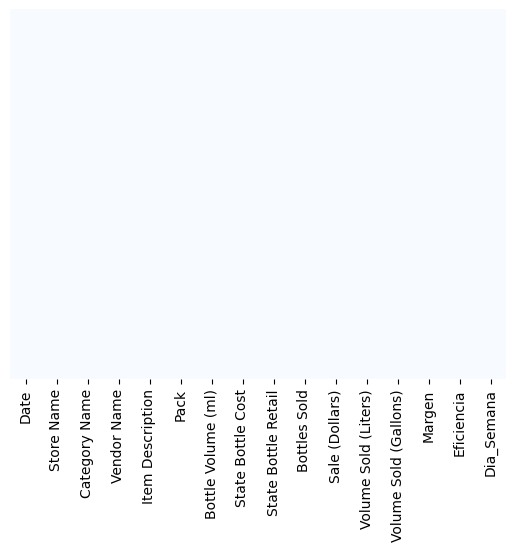

In [ ]:
# Crea un mapa de calor para visualizar los valores faltantes en el DataFrame df_linn_model.
# - yticklabels=False: Oculta las etiquetas del eje y.
# - cbar=False: Oculta la barra de colores.
# - cmap='Blues': Utiliza la paleta de colores 'Blues' para el mapa de calor.
sns.heatmap(df_linn_model.isnull(), yticklabels=False, cbar=False, cmap='Blues')
plt.show() # Muestra el mapa de calor generado

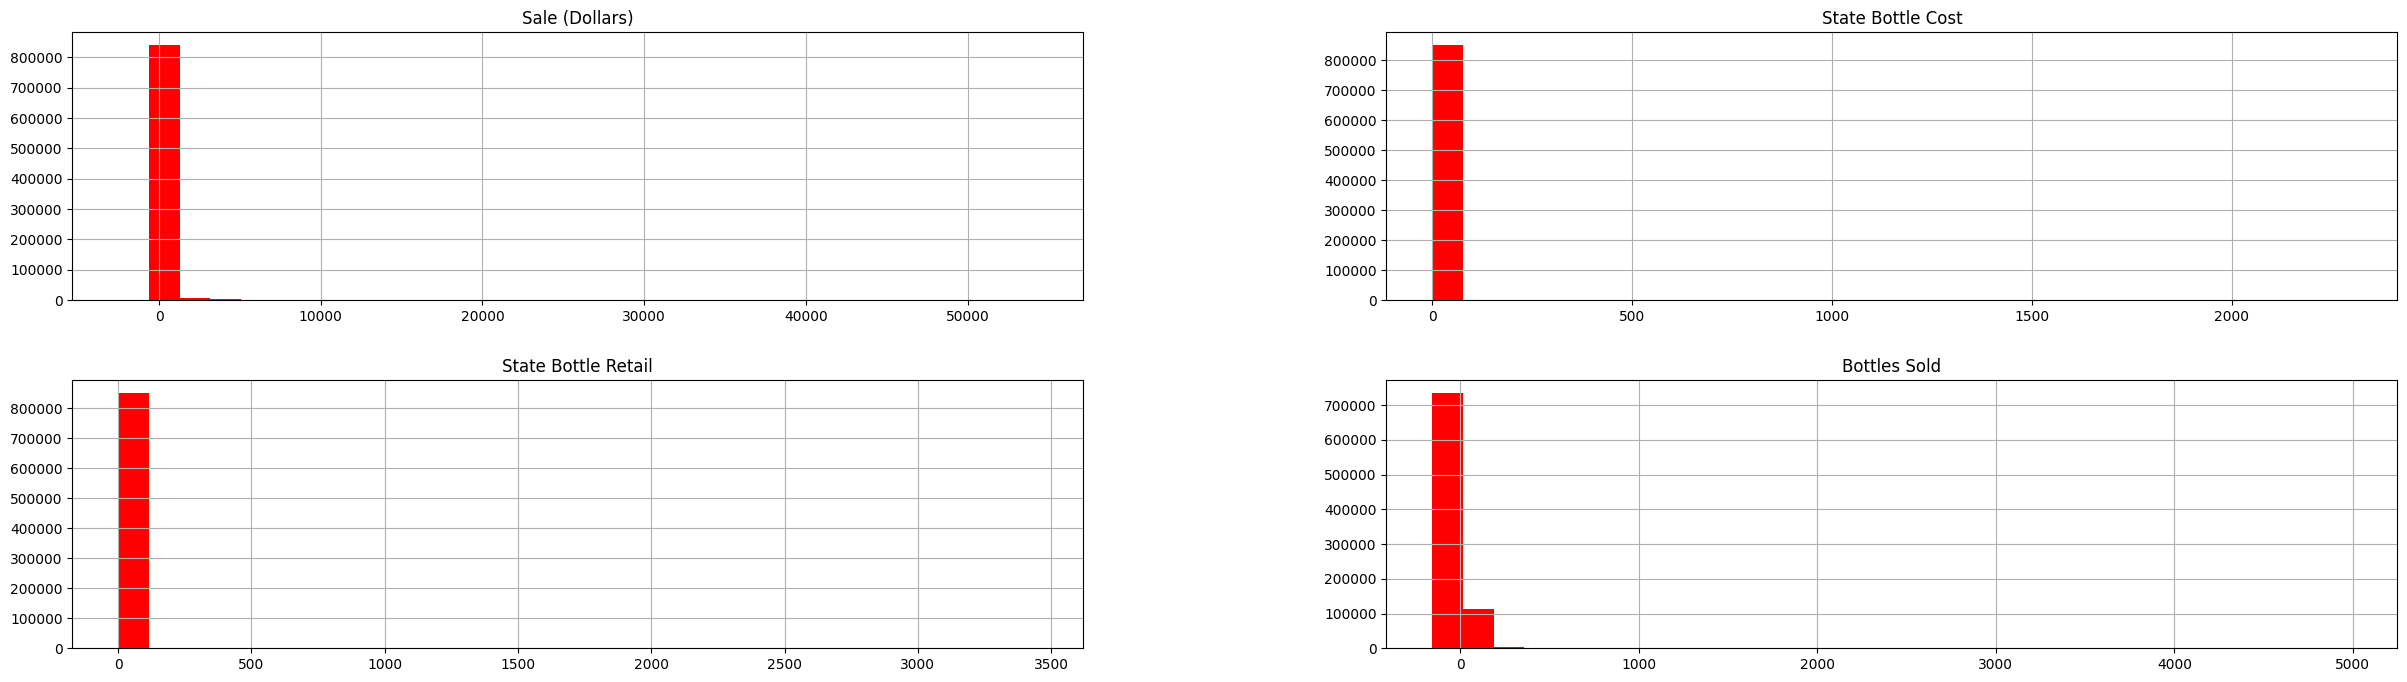

In [ ]:
# Crea histogramas para las columnas especificadas del DataFrame df_linn_model.
# - bins=30: Divide los datos en 30 bins (intervalos) para el histograma.
# - figsize=(30, 8): Define el tamaño de la figura del histograma (ancho, alto).
# - color='r': Establece el color de las barras del histograma a rojo.
df_linn_model[['Sale (Dollars)','State Bottle Cost','State Bottle Retail','Bottles Sold']].hist(bins=30, figsize=(30, 8), color='r')
plt.show() # Muestra los histogramas generados.

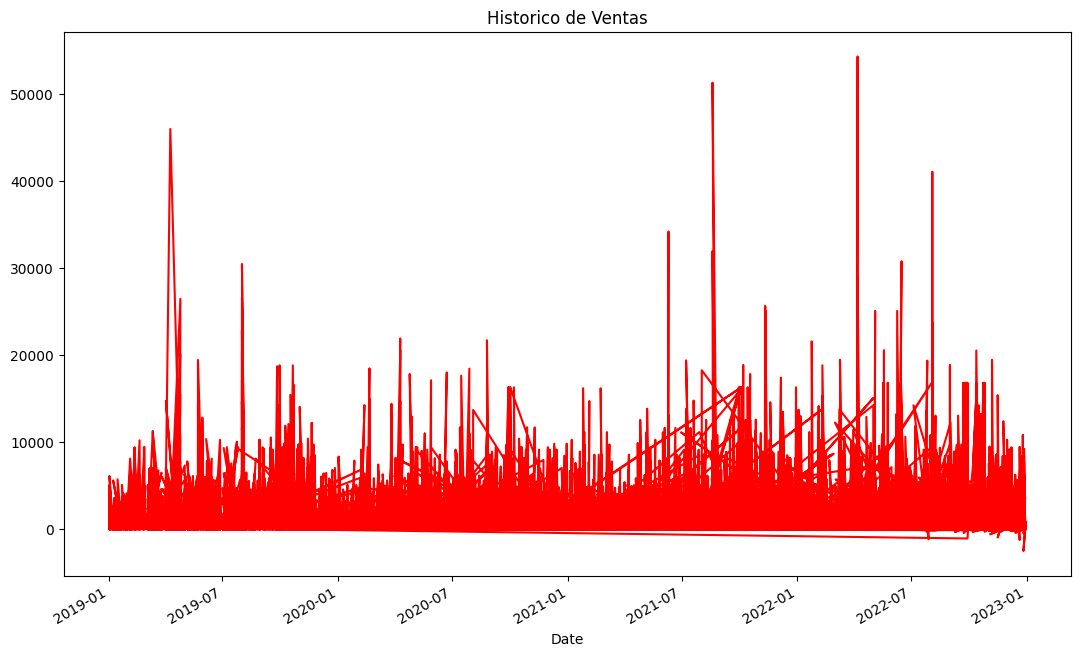

In [ ]:
# Establece la columna 'Date' como índice del DataFrame y selecciona la columna 'Sale (Dollars)'.
# Luego, grafica la serie temporal de ventas con un tamaño de figura de (13, 8) y color rojo.
df_linn_model.set_index('Date')['Sale (Dollars)'].plot(figsize=(13, 8), color='r').get_figure()

# Agrega un título al gráfico.
plt.title('Historico de Ventas')
plt.show() # Muestra el gráfico generado.

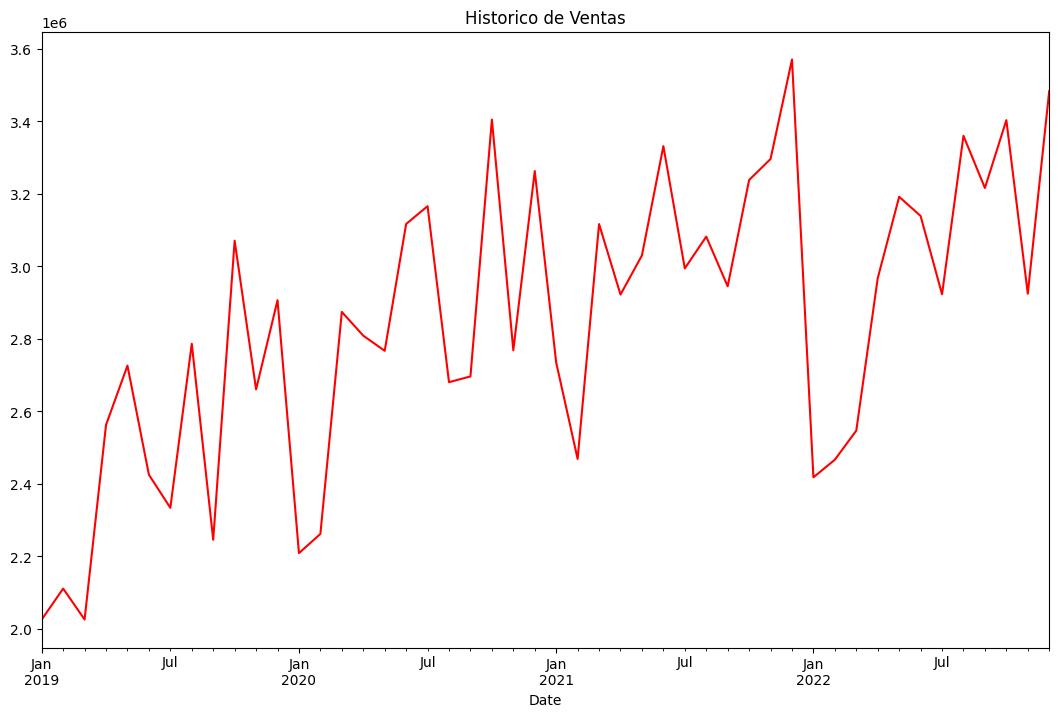

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convierte la columna 'Date' a DatetimeIndex y la establece como índice
df_linn_model['Date'] = pd.to_datetime(df_linn_model['Date']) # Convierte la columna 'Date' a objetos datetime
df_linn_model = df_linn_model.set_index('Date')  # Establece la columna 'Date' como índice

# Ahora puedes remuestrear
# Remuestrea los datos a nivel mensual ('M') y suma las ventas ('Sale (Dollars)') para cada mes
monthly_sales2 = df_linn_model.resample('M')['Sale (Dollars)'].sum()

# Procede con la gráfica
monthly_sales2.plot(figsize=(13, 8), color='r') # Grafica directamente monthly_sales, el índice ya es 'Date'
plt.title('Historico de Ventas')
plt.show() # Muestra el gráfico generado.

In [ ]:
# Reinicia el índice del DataFrame monthly_sales2 para que la columna 'Date' vuelva a ser una columna regular.
monthly_sales2 = monthly_sales2.reset_index()
print(monthly_sales2.head(5)) # Imprime las primeras 5 filas del DataFrame actualizado.

# Extrae correctamente el año y el mes de la columna 'Date'
monthly_sales2['Year'] = monthly_sales2['Date'].dt.year  # Crea una nueva columna 'Year' con el año extraído.
monthly_sales2['Month'] = monthly_sales2['Date'].dt.month # Crea una nueva columna 'Month' con el mes extraído.

# Muestra el DataFrame actualizado
monthly_sales2.head()

        Date  Sale (Dollars)
0 2019-01-31      2025478.39
1 2019-02-28      2110798.62
2 2019-03-31      2025517.79
3 2019-04-30      2562350.51
4 2019-05-31      2726065.13


,Date,Sale (Dollars),Year,Month
0,2019-01-31,2025478.39,2019,1
1,2019-02-28,2110798.62,2019,2
2,2019-03-31,2025517.79,2019,3
3,2019-04-30,2562350.51,2019,4
4,2019-05-31,2726065.13,2019,5


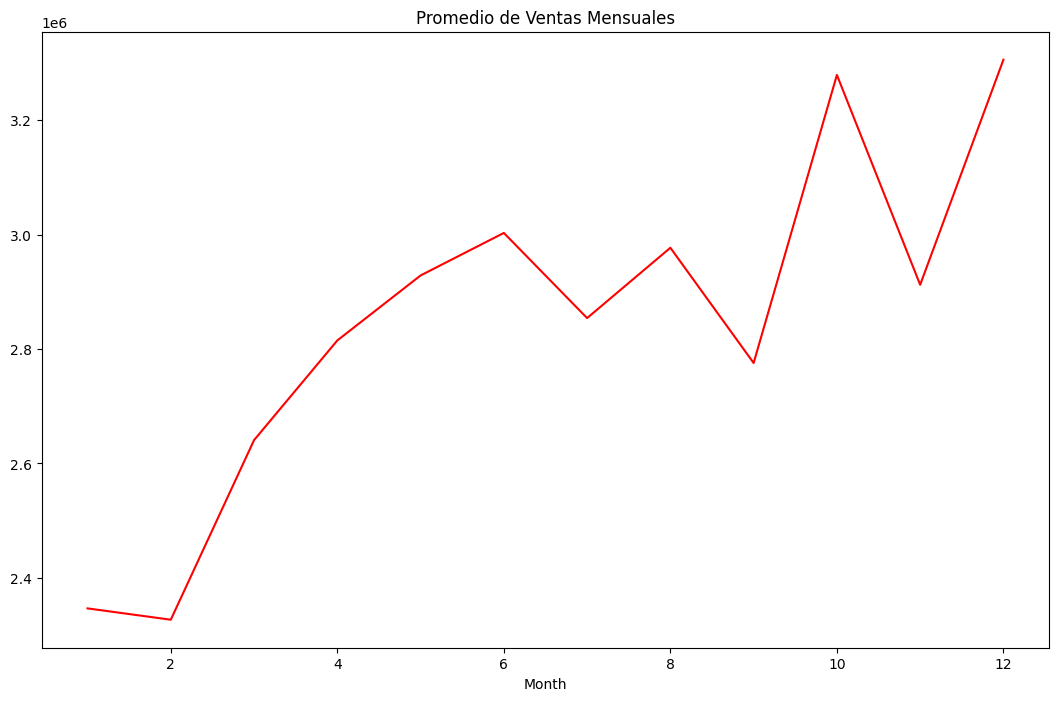

In [ ]:
# Agrupa los datos por mes, calcula el promedio de ventas para cada mes y grafica la serie temporal.
axis = monthly_sales2.groupby('Month')['Sale (Dollars)'].mean().plot(figsize=(13, 8), color='r')

# Establece el título del gráfico.
axis.set_title('Promedio de Ventas Mensuales')
plt.show() # Muestra el gráfico generado.

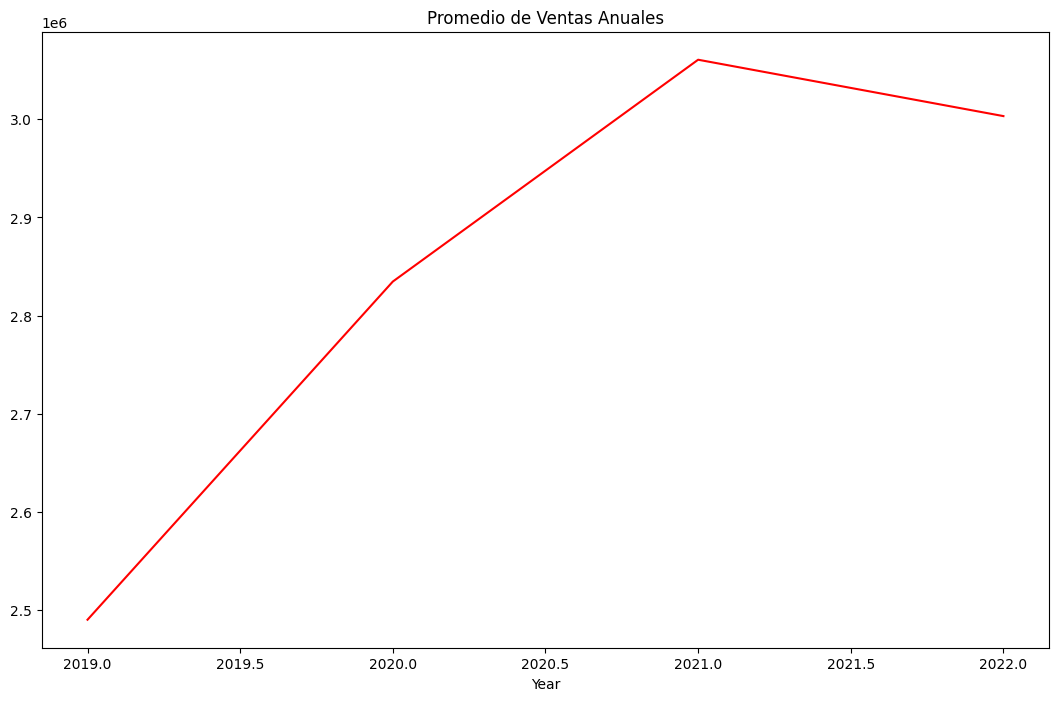

In [ ]:
# Agrupa los datos por año, calcula el promedio de ventas para cada año y grafica la serie temporal.
axis = monthly_sales2.groupby('Year')['Sale (Dollars)'].mean().plot(figsize=(13, 8), color='r')

# Establece el título del gráfico.
axis.set_title('Promedio de Ventas Anuales')  # Cambiado a "Anuales" para reflejar el agrupamiento
plt.show() # Muestra el gráfico generado.

In [ ]:
# Renombra las columnas 'Date' a 'ds' y 'Sale (Dollars)' a 'y' en el DataFrame monthly_sales2.
# Esto se hace para preparar los datos para su uso con la librería Prophet.
monthly_sales2 = monthly_sales2.rename(columns={'Date': 'ds', 'Sale (Dollars)': 'y'})
monthly_sales2.head(5) # Muestra las primeras 5 filas del DataFrame con las columnas renombradas.

,ds,y,Year,Month
0,2019-01-31,2025478.39,2019,1
1,2019-02-28,2110798.62,2019,2
2,2019-03-31,2025517.79,2019,3
3,2019-04-30,2562350.51,2019,4
4,2019-05-31,2726065.13,2019,5


In [ ]:
# Aplica una transformación logarítmica (log1p) a la columna 'y' (datos de ventas) en el DataFrame monthly_sales2.
# Esto se hace a menudo para estabilizar la varianza y hacer que los datos sean más adecuados para ciertos modelos estadísticos,
# especialmente si los datos de ventas tienen un rango amplio o exhiben un crecimiento exponencial.
# Se usa log1p para evitar problemas con log(0) al calcular log(1 + x) en lugar de log(x).
monthly_sales2['y'] = np.log1p(monthly_sales2['y'])

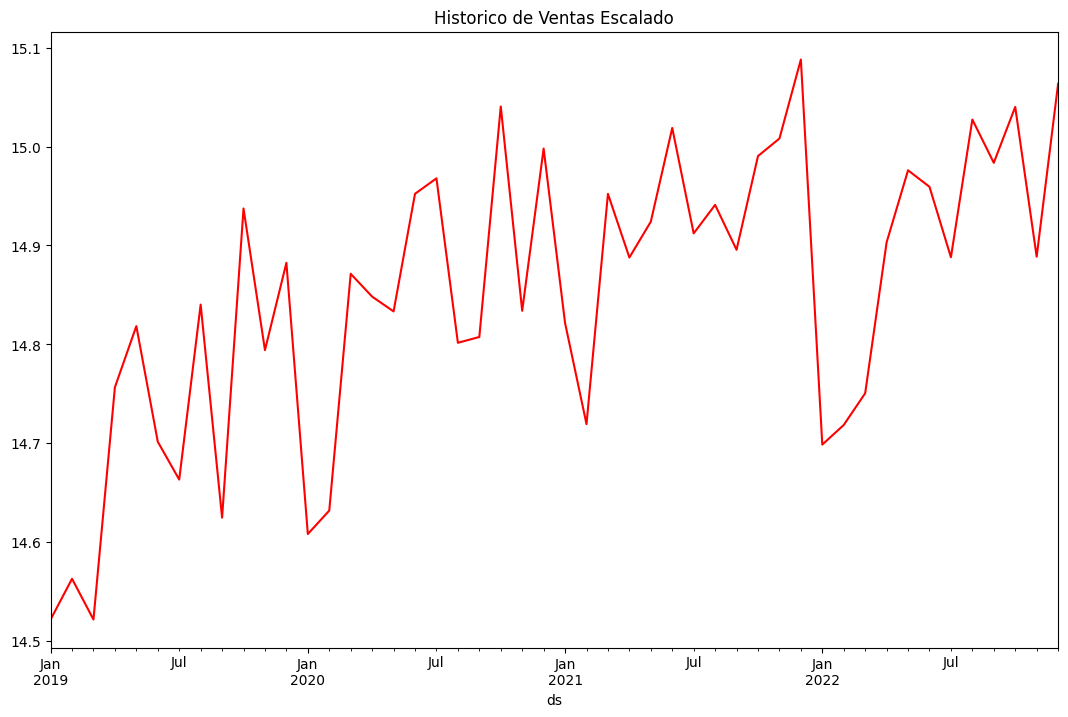

In [ ]:
# Establece la columna 'ds' como índice, selecciona la columna 'y' (ventas transformadas) y grafica la serie temporal.
# figsize=(13, 8) define el tamaño de la figura y color='r' establece el color a rojo.
monthly_sales2.set_index('ds').y.plot(figsize=(13, 8), color='r').get_figure()

# Agrega un título al gráfico.
plt.title('Historico de Ventas Escalado')
plt.show()  # Muestra el gráfico generado.

Nota. La grafica muestra el compartimiento de los datos trasformados logarítmicamente donde se
reducen o eliminan las anomalías de los datos.

In [ ]:
# Importa la librería Prophet para el modelado de series temporales
from prophet import Prophet

# Importa funciones para la validación cruzada del modelo
from prophet.diagnostics import cross_validation

# Importa funciones para evaluar el rendimiento del modelo
from prophet.diagnostics import performance_metrics

# Importa función para visualizar las métricas de validación cruzada
from prophet.plot import plot_cross_validation_metric

# Importa métricas de error de sklearn para evaluar el modelo
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# Crea una instancia del modelo Prophet con la configuración predeterminada.
model = Prophet()

# Entrena el modelo Prophet con los datos de ventas mensuales.
model.fit(monthly_sales2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdps9vltx/rnewsint.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdps9vltx/cpborron.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2531', 'data', 'file=/tmp/tmpdps9vltx/rnewsint.json', 'init=/tmp/tmpdps9vltx/cpborron.json', 'output', 'file=/tmp/tmpdps9vltx/prophet_modelswmxr3i1/prophet_model-20241111223921.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
22:39:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:39:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Crea un DataFrame futuro para predecir los próximos 6 meses con una frecuencia mensual.
future = model.make_future_dataframe(periods=6, freq='M')

# Muestra las últimas 5 filas del DataFrame futuro.
future.tail()

,ds
49,2023-02-28
50,2023-03-31
51,2023-04-30
52,2023-05-31
53,2023-06-30


In [ ]:
# Realiza predicciones utilizando el modelo entrenado y el DataFrame futuro.
forecast = model.predict(future)

# Muestra las últimas 5 filas del DataFrame con las predicciones.
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
49,2023-02-28,14.96,14.81,14.91,14.96,14.96,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,0.00,0.00,0.00,14.86
50,2023-03-31,14.97,14.78,14.87,14.96,14.97,-0.15,-0.15,-0.15,-0.15,-0.15,-0.15,0.00,0.00,0.00,14.82
51,2023-04-30,14.97,14.99,15.09,14.96,14.99,0.07,0.07,0.07,0.07,0.07,0.07,0.00,0.00,0.00,15.04
52,2023-05-31,14.98,15.06,15.16,14.97,15.00,0.13,0.13,0.13,0.13,0.13,0.13,0.00,0.00,0.00,15.11
53,2023-06-30,14.99,14.95,15.05,14.97,15.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,15.00


In [ ]:
# Muestra las últimas 5 filas del DataFrame con las columnas seleccionadas:
#   - ds: Fecha
#   - yhat: Valor predicho
#   - yhat_lower: Límite inferior del intervalo de confianza
#   - yhat_upper: Límite superior del intervalo de confianza
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
49,2023-02-28,14.86,14.81,14.91
50,2023-03-31,14.82,14.78,14.87
51,2023-04-30,15.04,14.99,15.09
52,2023-05-31,15.11,15.06,15.16
53,2023-06-30,15.00,14.95,15.05


In [ ]:
# Obtiene la última fecha presente en los datos de ventas mensuales.
last_date = monthly_sales2['ds'].max()

# Muestra la última fecha.
last_date

Timestamp('2022-12-31 00:00:00')

In [ ]:
# Se aplica la función exponencial inversa (expm1) para revertir la transformación logarítmica
# aplicada previamente a las columnas 'yhat', 'yhat_lower' e 'yhat_upper' del DataFrame 'forecast'.
# Esto devuelve las predicciones y los intervalos de confianza a su escala original.
forecast[['yhat', 'yhat_lower', 'yhat_upper']] = np.expm1(forecast[['yhat', 'yhat_lower', 'yhat_upper']])

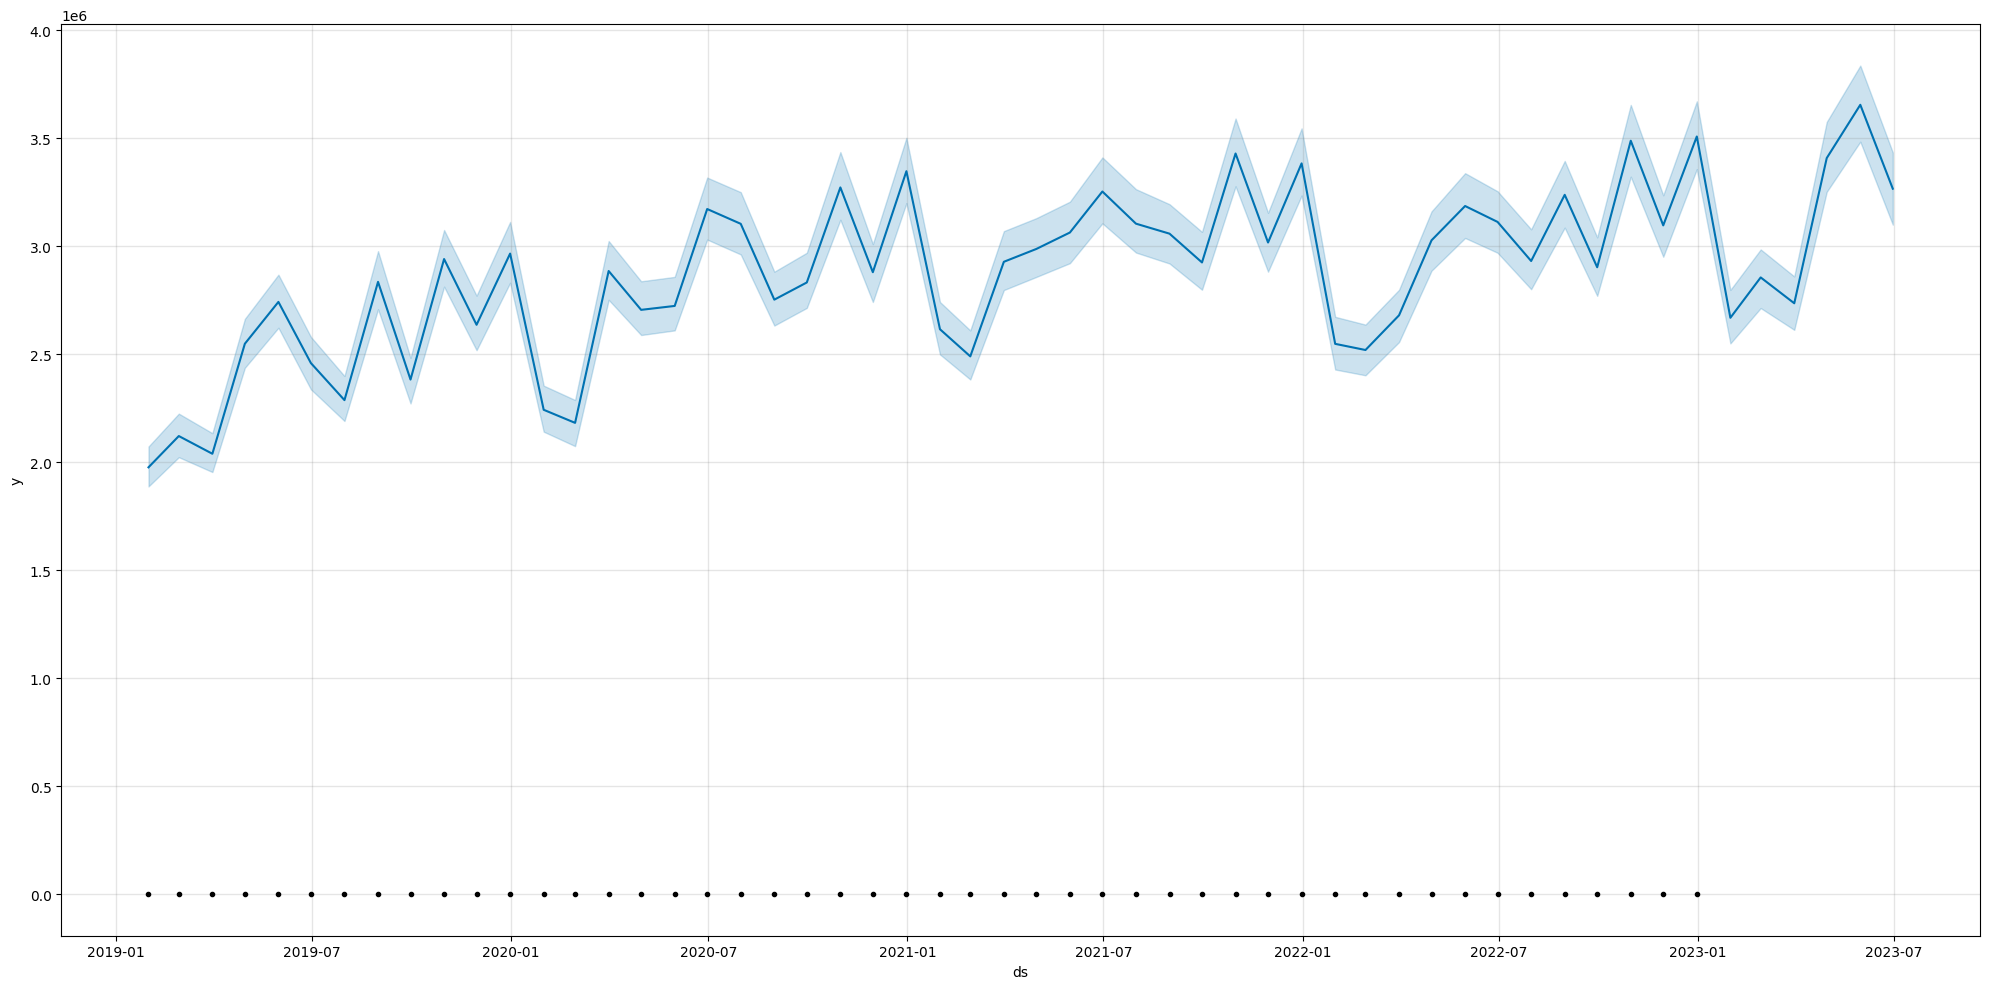

In [ ]:
# Genera una gráfica de la predicción utilizando el modelo Prophet.
# La gráfica mostrará los datos históricos, la predicción y los intervalos de incertidumbre.
model.plot(forecast, figsize=(20, 10))

# Muestra la gráfica generada.
plt.show()

Nota. los puntos negros representan los datos originales, la línea azul representa el modelo y la
sombra azul, los limites inferior y superior.

In [ ]:
# Renombra la columna 'y' de monthly_sales2 como 'y_actual' para diferenciarla de la columna 'yhat'
# Esto se hace para evitar confusiones al combinar los datos reales con las predicciones.
merged_data = pd.merge(monthly_sales2[['ds','y']], forecast[['ds', 'yhat']], on='ds', how='inner').rename(columns={'y':'y_actual'})

# Calcula el R-cuadrado utilizando la columna 'y_actual' (originalmente 'y') de monthly_sales2 y la columna 'yhat' de forecast
# El R-cuadrado mide la proporción de la varianza en la variable dependiente que es predecible a partir de la variable independiente.
print("R2:  " + str(r2_score(merged_data.y_actual, merged_data.yhat)))

# Calcula el Error Cuadrático Medio (MSE) utilizando la columna 'y_actual' y la columna 'yhat'
# El MSE mide el promedio de los errores al cuadrado entre los valores reales y los valores predichos.
print("MSE: " + str(mean_squared_error(merged_data.y_actual, merged_data.yhat)))

# Calcula el Error Absoluto Medio (MAD) utilizando la columna 'y_actual' y la columna 'yhat'
# El MAD mide el promedio de las diferencias absolutas entre los valores reales y los valores predichos.
print("MAD: " + str(mean_absolute_error(merged_data.y_actual, merged_data.yhat)))

**Interpreting the Metrics:**

**R² (R-squared):**

*   Ranges from 0 to 1.
*   A higher R² indicates a better fit, meaning the model explains more of the variance in the data.
*   An R² of 1 represents a perfect fit, where the model predicts all data points accurately.
*  **Example:** If your R² is 0.85, it means that your model explains 85% of the variance in the sales data.

**MSE (Mean Squared Error):**
*   Measures the average squared difference between the actual and predicted values.
*   A lower MSE is better, indicating smaller errors.
*   ensitive to outliers due to the squaring of errors.
*   **Example:** An MSE of 100 means that, on average, the squared difference between your model's predictions and the actual sales is 100 units.

**MAD (Mean Absolute Deviation/Error):**
*   Measures the average absolute difference between the actual and predicted values.
*   A lower MAD is better, indicating smaller errors.
*   Less sensitive to outliers compared to MSE.
*   **Example:** An MAD of 5 means that, on average, your model's predictions are off by 5 units from the actual sales.

In [ ]:
forecast